## FMO data from neutral-, +9- and +10-ubiquitin states

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
import csv as csv
from __future__ import print_function
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
from mpl_toolkits.axes_grid1 import make_axes_locatable

____________________________

In [3]:
from scipy.optimize import leastsq
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

In [3]:
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['axes.titlesize'] = 24

## Contact maps

source: https://nanohub.org/resources/contactmaps

In [4]:
def draw(matrix, fig=None, cmap = 'coolwarm', interpolation = 'nearest', colorbar = True, contour = False):
        """
        Creates a matplotlib figure representing the map's matrix.  An existing
        figure can be provided to be drawn on, otherwise a new figure will be
        created.
        """
        if not fig: fig = Figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(matrix, cmap = matplotlib.cm.get_cmap(cmap), \
                         interpolation = interpolation, origin="lower")
        #ax.set_title(self.title)
        #ax.set_xlabel(self.xlabel)
        #ax.set_ylabel(self.ylabel)
        if colorbar: 
            cbar = fig.colorbar(cax, cmap = matplotlib.cm.get_cmap(cmap))
        #    cbar.ax.set_ylabel(self.colorbarlabel)
        if contour:
            ax.contour(matrix, cmap = matplotlib.cm.get_cmap(cmap))
        return fig

In [ ]:
    f = plt.figure(figsize=(17, 17))
plt.matshow(df_map_9p_ect, fignum=f.number)
plt.xticks(range(df_map_9p_ect.select_dtypes(['number']).shape[1]), df_map_9p_ect.select_dtypes(['number']).columns + 1, fontsize=10, rotation=45)
plt.yticks(range(df_map_9p_ect.select_dtypes(['number']).shape[1]), df_map_9p_ect.select_dtypes(['number']).columns + 1, fontsize=10)

#ax = plt.subplot()
#im = ax.imshow(np.arange(100).reshape((10, 10)))
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.05)

cb = plt.colorbar()
cb.solids.set_edgecolor("face")
cb.ax.tick_params(labelsize=10)
plt.title('Charge transfer energy correlation matrix', fontsize=16)

In [5]:
def show(matrix):
    """
    Use pyplot to display the map in an interactive window.  Will block
    until the window is closed.
    """
    import matplotlib.pyplot as plt
    draw(matrix, fig = plt.figure())
    plt.show()

In [6]:
def print_figure(matrix, filename="map.png"):
    """
    Generates a plot of the map's data and saves an image at the given
    filename.
    """
    canvas = FigureCanvas(draw(matrix))
    canvas.print_figure(filename)

In [7]:
def print_csv(matrix, filename="map.csv"):
    np.savetxt(filename, matrix, delimiter = ',')
    print('Saved matrix as file %s' % filename)

In [7]:
matrix = np.ones((5, 5))

/tmp/ipykernel_439328/4182756724.py:15: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(cax, cmap = matplotlib.cm.get_cmap(cmap))


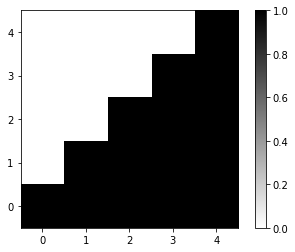

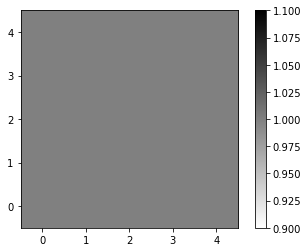

Saved matrix as file map.csv


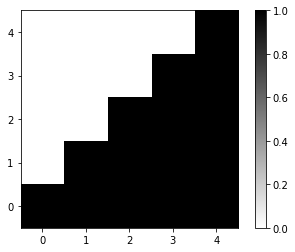

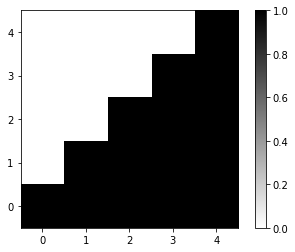

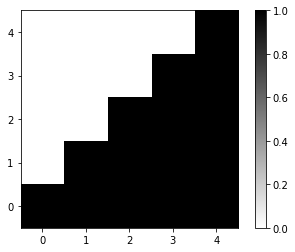

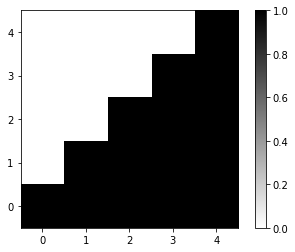

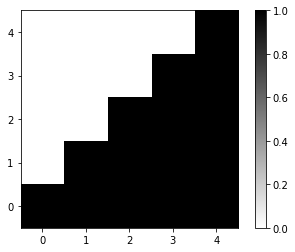

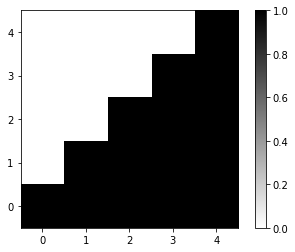

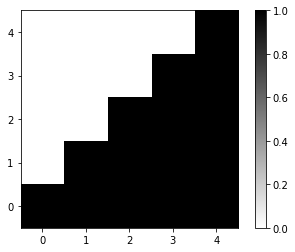

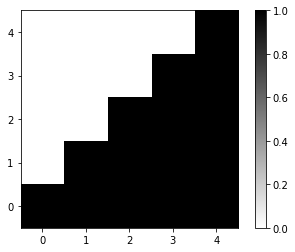

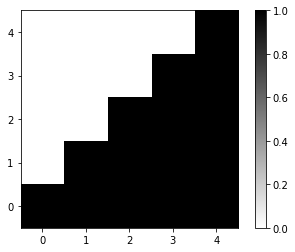

In [8]:
for i in range(0, 400, 40):
    'Output one contact map per 40 ns from a 400 ns trjactory'
    name = 'dist-map-%dns.png' % (i * 0.05)
    #matrix = calc_matrix_dis(trj = traj, frame = i)
    show(matrix = np.triu(matrix))
    print_figure(matrix, filename = name)
    
    if i > 0: continue
    #matrix = calc_matrix_cm(trj = traj, frame = i)
    show(matrix = matrix)
    print_figure(matrix, filename="cm-map.png")
    print_csv(matrix)

--------------

## Data is presented according to the sorting type

### Those features correspond to the properties that they calculated using FMO2/MP2/6-31G(d)

In [8]:
def get_fmo_prop(csv_file, col_head=None):
    """
    it returns information as a pandas frame from a .csv file.
    """
    if (col_head is None):
        return pd.read_csv(csv_file, delimiter=',')
    else:
        dff = pd.read_csv(csv_file, delimiter=',', header=None)
        dff.columns = col_head
        return dff

In [9]:
def show_fmo_data(df, rows=5, cols=15):
    """
    It shows only a specific number of rows and columns.
    """
    
    pd.set_option("display.max_columns", cols)
    pd.set_option("display.max_rows", rows*2)
    
    return df.head(rows).append(df.tail(rows))

### Header FMO one-body properties

In [10]:
fmo1_col_head = ["Frag.#","AA","Res.#","Layer","E''corr","E''uncorr","DX","DY","DZ"]

In [11]:
data_neut_FMO1_1 = get_fmo_prop('fr2-neut/fr2-neutfmo-1body_1.csv', fmo1_col_head)
data_9p_FMO1_1 = get_fmo_prop('fr2-9p/fr2-9pfmo-1body_1.csv', fmo1_col_head)
data_10p_FMO1_1 = get_fmo_prop('fr2-10p/fr2-10pfmo-1body_1.csv', fmo1_col_head)

In [12]:
data_neut_last1_FMO1_1 = get_fmo_prop('fr170-neut/fr170-neutfmo-1body_1.csv', fmo1_col_head)
data_neut_last2_FMO1_1 = get_fmo_prop('fr164-neut/fr164-neutfmo-1body_1.csv', fmo1_col_head)
data_9p_last_FMO1_1 = get_fmo_prop('fr170-9p/fr170-9pfmo-1body_1.csv', fmo1_col_head)
data_10p_last_FMO1_1 = get_fmo_prop('fr164-10p/fr164-10pfmo-1body_1.csv', fmo1_col_head)

In [13]:
show_fmo_data(data_10p_FMO1_1,5)

,Frag.#,AA,Res.#,Layer,E''corr,E''uncorr,DX,DY,DZ
0,1,MET,1,L1,-1049.177226,-1047.104389,-7.54143,0.29259,-4.01729
1,2,ILE,3,L1,-348.865954,-347.804125,7.37989,4.86699,-0.39428
2,3,PHE,4,L1,-461.664014,-460.241673,-3.62339,-2.38486,5.49325
3,4,VAL,5,L1,-309.712681,-308.781533,2.41458,6.70922,-4.00659
4,5,LYS,6,L1,-404.412015,-403.188600,-21.11204,50.31432,10.62940
70,71,ARG,72,L1,-513.652251,-512.122685,47.99229,6.20157,52.99707
71,72,LEU,73,L1,-348.881956,-347.818670,-4.09351,-1.43281,6.23064
72,73,ARG,74,L1,-513.667484,-512.139143,54.25097,66.89265,96.75058
73,74,GLY,75,L1,-192.254280,-191.714948,-1.35112,-2.72074,6.37050
74,75,GLY,76,L1,-395.683444,-394.619988,-4.12029,6.14250,-2.85611


Fragment number (Frag.#)\
AA (amino acid)\
Residue number (Res.#)\
Layer level of FMO calculation (Layer)

### Header FMO two-body properties

In [14]:
data_neut_FMO2_1 = get_fmo_prop('fr2-neut/fr2-neutfmo-2body_1.csv')
data_9p_FMO2_1 = get_fmo_prop('fr2-9p/fr2-9pfmo-2body_1.csv')
data_10p_FMO2_1 = get_fmo_prop('fr2-10p/fr2-10pfmo-2body_1.csv')

In [15]:
data_neut_last1_FMO2_1 = get_fmo_prop('fr170-neut/fr170-neutfmo-2body_1.csv')
data_neut_last2_FMO2_1 = get_fmo_prop('fr164-neut/fr164-neutfmo-2body_1.csv')
data_9p_last_FMO2_1 = get_fmo_prop('fr170-9p/fr170-9pfmo-2body_1.csv')
data_10p_last_FMO2_1 = get_fmo_prop('fr164-10p/fr164-10pfmo-2body_1.csv')

In [16]:
show_fmo_data(data_neut_FMO2_1,5)

,I,J,DL,Z,R,Q(I->J),EIJ-EI-EJ,dDIJ*VIJ,total,Ees,Eex,Ect+mix,Erc+di,Gsol
0,2,1,C1,0,0.00,0.0187,-9529.013,-0.481,-9529.494,-9279.483,-132.765,-72.245,-45.001,0.0
1,3,1,C1,0,0.82,-0.0302,-11.976,-3.624,-15.601,-12.110,4.817,-2.926,-5.382,0.0
2,3,2,C1,0,0.00,0.0177,-9534.926,0.572,-9534.355,-9289.060,-138.606,-65.720,-40.968,0.0
3,4,1,C1,0,1.71,-0.0000,2.180,-0.498,1.682,1.765,-0.001,-0.020,-0.062,0.0
4,4,2,C1,0,1.01,0.0001,5.367,-4.010,1.357,3.165,0.592,-0.681,-1.718,0.0
2770,75,70,S1,0,2.69,0.0000,0.239,0.000,0.239,0.239,0.000,0.000,0.000,0.0
2771,75,71,C1,0,0.88,-0.0323,-6.694,0.025,-6.669,-7.319,11.110,-2.956,-7.503,0.0
2772,75,72,C1,0,0.70,-0.0482,-5.787,-3.142,-8.928,-11.465,11.560,-4.351,-4.673,0.0
2773,75,73,C1,0,0.76,0.0279,-5.177,-5.017,-10.195,-10.697,5.273,-1.054,-3.717,0.0
2774,75,74,C1,0,0.00,0.0600,-9504.291,1.114,-9503.177,-9268.369,-140.339,-60.035,-34.434,0.0


In [17]:
noncov_10p_last_FMO2_1 = data_10p_last_FMO2_1.loc[data_10p_last_FMO2_1['R'] != 0]

DL: D=C dynamically correlated (MP2,CI), D=N not dynamically correlated\
(RHF,DFT). D=S separated dimer: semiclassical interaction (ES), D=M MCSCF.\
L: Layer level\
Z: Monomer charge product\
R: Interfragment distance relative to van-der-Waals radii\
   (-1.00 is printed if distances are not computed).\
dDIJ*VIJ: Explicit embedded charge transfer energy.\
Q(I->J): Charge transfer amount, printed as zero if not available.\
Positive values correspond to I in IJ having extra negative charge.\
total = (EIJ-EI-EJ)+dDIJ*VIJ+Gsol = Ees+Eex+Ect+mix+Edisp+Gsol (kcal/mol).

### Header FMO charge transfer for each fragment

In [18]:
fmo2_2col_head = ["IFG","QFG","Delta Q =","JFG ->","Q(JFG ->)","2nd-J","2nd-QJ","3rd-J","3rd-QJ","4th-J","4th-QJ"]

In [19]:
data_neut_FMO2_2 = get_fmo_prop('fr2-neut/fr2-neutfmo-2body_2.csv', fmo2_2col_head)
data_9p_FMO2_2 = get_fmo_prop('fr2-9p/fr2-9pfmo-2body_2.csv', fmo2_2col_head)
data_10p_FMO2_2 = get_fmo_prop('fr2-10p/fr2-10pfmo-2body_2.csv', fmo2_2col_head)

In [20]:
data_neut_last1_FMO2_2 = get_fmo_prop('fr170-neut/fr170-neutfmo-2body_2.csv', fmo2_2col_head)
data_neut_last2_FMO2_2 = get_fmo_prop('fr164-neut/fr164-neutfmo-2body_2.csv', fmo2_2col_head)
data_9p_last_FMO2_2 = get_fmo_prop('fr170-9p/fr170-9pfmo-2body_2.csv', fmo2_2col_head)
data_10p_last_FMO2_2 = get_fmo_prop('fr164-10p/fr164-10pfmo-2body_2.csv', fmo2_2col_head)

In [21]:
show_fmo_data(data_10p_FMO2_2,5)

,IFG,QFG,Delta Q =,JFG ->,Q(JFG ->),2nd-J,2nd-QJ,3rd-J,3rd-QJ,4th-J,4th-QJ
0,1,0,0.0661,16,0.0376,15,0.0239,13,0.0172,3,-0.0167
1,2,0,-0.0281,63,0.0473,15,-0.0405,65,-0.0174,1,-0.0117
2,3,0,0.0547,4,0.0347,14,0.0270,65,-0.0225,1,0.0167
3,4,0,-0.0161,13,-0.0382,3,-0.0347,66,0.0327,5,0.0292
4,5,1,-0.1988,67,-0.0910,7,-0.0356,12,0.0342,9,-0.0325
70,71,1,-0.1316,39,-0.0878,38,-0.0317,40,-0.0167,73,0.0037
71,72,0,-0.0116,73,-0.0231,39,0.0195,74,-0.0045,71,-0.0035
72,73,1,-0.0538,75,-0.0745,72,0.0231,71,-0.0037,74,0.0012
73,74,0,0.0498,75,0.0465,72,0.0045,73,-0.0012,0,0.0000
74,75,0,0.0280,73,0.0745,74,-0.0465,72,-0.0000,0,0.0000


Ith-fragment number (IFG)\
Ith-fragment charge (QFG)\
(Delta Q)\
Q(JFG->IFG): Charge transfer amount, printed as zero if not available\
Jth-fragment number to Ith-fragment:
Jth fragment (JFG ->)
Jth fragment charge Q(JFG ->)
The other contributions from JFG, Q(JFG->IFG) are presented using the following\
convention:
2nd-J,2nd-QJ,3rd-J,3rd-QJ,4th-J,4th-QJ

### --

In [11]:
from plydata import define, if_else

### 1UBQ - Ubiquitin

Information from '1ubq_mp2_9neutfr2_pieda.log', '1ubq_mp2_9pfr2_pieda.log' and '1ubq_mp2_10pfr2_pieda.log' is already processed.

##### Combining data from FMO1_1, FMO2_1 and FMO2_2

In [34]:


#df = pd.concat([df1.add_suffix('(1)'), df2.add_suffix('(2)')], axis=1)

#data_FMO1_1[["Frag.#","AA","Res.#","E''corr"]]


,Frag.#,AA,Res.#,E''corr
0,1,MET,1,-1049.176753
1,2,ILE,3,-348.878554
2,3,PHE,4,-461.679929
3,4,VAL,5,-309.714998
4,5,LYS,6,-404.434715
...,...,...,...,...
70,71,ARG,72,-513.666380
71,72,LEU,73,-348.879061
72,73,ARG,74,-513.693500
73,74,GLY,75,-192.252418


In [22]:
def get_one_feat_info(df, feature, num_feat):
    """
    it returns information from a specific feature number where feature
    can be a fragment or residue in the FMO one-body properties.
    num_feat has to be a non-string value
    """
    return df.loc[df[feature] == num_feat]

In [23]:
def get_aa_info(df, aa):
    """
    it returns information having the same amino acid name in the FMO one-body properties
    """
    return df[df['AA'].str.match(aa)]

In [24]:
def get_one_frag_feat_info(df_1, df_2, feature='I', num_res=1):
    """
    it returns information from a specific fragment feature and residue number.
    Where fragment feature could be I-th of J-th fragment and residue number
    corresponds to the specific amino acid to obtain the FMO two-body properties.
    df_1 is a data frame having FMO one-body properties.
    df_2 is a data frame having FMO two-body properties.
    feature is I or J.
    num_res has to be an integer value.
    """
    frag_num = get_one_feat_info(df_1, 'Res.#', num_res)['Frag.#'].iloc[0]
    return get_one_feat_info(df_2, feature, frag_num)

In [25]:
def get_one_res_feat_info(df_1, df_2, feature='I', num_frag=1):
    """
    it returns information from a specific fragment feature and number.
    Where fragment feature could be I-th of J-th fragment and fragment number
    corresponds to the specific fragment from Facio to obtain the FMO two-body properties.
    df_1 is a data frame having FMO one-body properties.
    df_2 is a data frame having FMO two-body properties.
    feature is I or J.
    num_frag has to be an integer value.
    """
    frag_res = get_one_feat_info(df_1, 'Frag.#', num_frag)['Res.#'].iloc[0]
    return get_one_feat_info(df_2, feature, frag_res)

In [26]:
def sorting_info(df, by_value):
    """
    it returns information sorted by the by_value parameter
    """
    return df.sort_values(by=[by_value])

Getting informaton from a known residue number

In [72]:
get_one_feat_info(data_neut_FMO1_1, 'Res.#', 27) #to find what fragment number has the residue to check

,Frag.#,AA,Res.#,Layer,E''corr,E''uncorr,DX,DY,DZ
25,26,LYS,27,L1,-404.049537,-402.82723,-0.86954,-2.90375,3.26418


Getting informaton from a known fragment number

In [71]:
get_one_feat_info(data_neut_FMO1_1, 'Frag.#', 27)

,Frag.#,AA,Res.#,Layer,E''corr,E''uncorr,DX,DY,DZ
26,27,ALA,28,L1,-231.405913,-230.742082,-3.27761,-5.20914,-0.14203


Getting informaton from a specific amino acid

In [73]:
get_aa_info(data_neut_FMO1_1, 'LYS')

,Frag.#,AA,Res.#,Layer,E''corr,E''uncorr,DX,DY,DZ
4,5,LYS,6,L1,-404.055891,-402.831774,-2.53229,-2.14378,3.20363
9,10,LYS,11,L1,-404.055640,-402.832408,6.61788,1.07758,3.76971
25,26,LYS,27,L1,-404.049537,-402.827230,-0.86954,-2.90375,3.26418
27,28,LYS,29,L1,-404.043866,-402.821828,-3.62972,-0.53473,1.53339
31,32,LYS,33,L1,-404.049141,-402.824651,-1.35609,-2.15317,3.01822
46,47,LYS,48,L1,-404.056796,-402.834204,-2.65326,2.19624,-6.56032
61,62,LYS,63,L1,-404.084029,-402.865945,-4.18838,-4.28884,-3.49525


Organizing information by energy values

In [74]:
sorting_info(get_aa_info(data_neut_FMO1_1, 'LYS'), "E''corr")

,Frag.#,AA,Res.#,Layer,E''corr,E''uncorr,DX,DY,DZ
61,62,LYS,63,L1,-404.084029,-402.865945,-4.18838,-4.28884,-3.49525
46,47,LYS,48,L1,-404.056796,-402.834204,-2.65326,2.19624,-6.56032
4,5,LYS,6,L1,-404.055891,-402.831774,-2.53229,-2.14378,3.20363
9,10,LYS,11,L1,-404.055640,-402.832408,6.61788,1.07758,3.76971
25,26,LYS,27,L1,-404.049537,-402.827230,-0.86954,-2.90375,3.26418
31,32,LYS,33,L1,-404.049141,-402.824651,-1.35609,-2.15317,3.01822
27,28,LYS,29,L1,-404.043866,-402.821828,-3.62972,-0.53473,1.53339


#### Lysine: Choosing Resiude #27 as model

In [27]:
get_one_frag_feat_info(data_neut_FMO1_1, data_neut_FMO2_1, 'I', 27) #...giving the number of the residue

,I,J,DL,Z,R,Q(I->J),EIJ-EI-EJ,dDIJ*VIJ,total,Ees,Eex,Ect+mix,Erc+di,Gsol
300,26,1,S1,0,3.26,0.0000,-0.229,0.000,-0.229,-0.229,0.000,0.000,0.000,0.0
301,26,2,C1,0,1.96,0.0000,-0.390,-0.178,-0.568,-0.533,-0.002,-0.004,-0.030,0.0
302,26,3,S1,0,3.29,0.0000,0.492,0.000,0.492,0.492,0.000,0.000,0.000,0.0
303,26,4,S1,0,2.09,0.0000,-0.489,0.000,-0.489,-0.489,0.000,0.000,0.000,0.0
304,26,5,S1,0,3.04,0.0000,0.137,0.000,0.137,0.137,0.000,0.000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,26,21,S1,0,2.03,0.0000,0.742,0.000,0.742,0.742,0.000,0.000,0.000,0.0
321,26,22,C1,0,0.99,0.0002,-4.205,-0.948,-5.154,-4.169,1.667,-0.509,-2.143,0.0
322,26,23,C1,0,0.73,0.0391,-7.072,-6.042,-13.113,-15.240,14.104,-4.034,-7.944,0.0
323,26,24,C1,0,0.99,0.0134,4.506,-4.318,0.188,1.833,1.499,-0.617,-2.527,0.0


In [81]:
get_one_res_feat_info(data_neut_FMO1_1, data_neut_FMO2_1, 'J', 25) #...giving the number of the fragment

,I,J,DL,Z,R,Q(I->J),EIJ-EI-EJ,dDIJ*VIJ,total,Ees,Eex,Ect+mix,Erc+di,Gsol
350,27,26,C1,0,0.00,0.0590,-9515.056,-0.500,-9515.557,-9274.596,-131.829,-70.951,-38.180,0.0
376,28,26,C1,0,0.89,0.0314,-3.459,-4.593,-8.053,-7.402,4.826,-1.351,-4.127,0.0
403,29,26,C1,0,0.78,0.0422,-12.126,-2.003,-14.129,-13.254,9.528,-4.171,-6.232,0.0
431,30,26,C1,0,1.39,0.0017,-4.556,-0.425,-4.981,-3.985,0.011,-0.362,-0.644,0.0
460,31,26,C1,0,1.98,0.0000,-1.694,0.385,-1.309,-1.171,-0.002,-0.027,-0.108,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,71,26,C1,0,0.84,-0.0292,-5.947,0.520,-5.427,-7.875,9.786,-2.886,-4.453,0.0
2510,72,26,S1,0,2.36,0.0000,0.182,0.000,0.182,0.182,0.000,0.000,0.000,0.0
2581,73,26,S1,0,2.63,0.0000,-0.284,0.000,-0.284,-0.284,0.000,0.000,0.000,0.0
2653,74,26,S1,0,2.51,0.0000,0.172,0.000,0.172,0.172,0.000,0.000,0.000,0.0


________________________

In [82]:
get_one_frag_feat_info(data_9p_FMO1_1, data_9p_FMO2_1, 'I', 27)

,I,J,DL,Z,R,Q(I->J),EIJ-EI-EJ,dDIJ*VIJ,total,Ees,Eex,Ect+mix,Erc+di,Gsol
300,26,1,S1,0,3.37,0.0000,0.104,0.000,0.104,0.104,0.000,0.000,0.000,0.0
301,26,2,C1,0,1.75,0.0000,-0.321,-0.254,-0.575,-0.533,-0.002,-0.007,-0.033,0.0
302,26,3,S1,0,3.08,0.0000,0.594,0.000,0.594,0.594,0.000,0.000,0.000,0.0
303,26,4,S1,0,2.23,0.0000,-0.345,0.000,-0.345,-0.345,0.000,0.000,0.000,0.0
304,26,5,S1,0,3.13,0.0000,-0.641,0.000,-0.641,-0.641,0.000,0.000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,26,21,S1,0,2.49,0.0000,-0.195,0.000,-0.195,-0.195,0.000,0.000,0.000,0.0
321,26,22,C1,0,1.32,0.0006,-1.977,-0.287,-2.264,-1.423,0.032,-0.226,-0.648,0.0
322,26,23,C1,0,0.74,0.0295,-8.900,-3.334,-12.234,-12.877,6.677,-1.720,-4.314,0.0
323,26,24,C1,0,0.92,0.0168,2.514,-3.185,-0.671,0.812,2.821,-1.405,-2.900,0.0


In [83]:
get_one_res_feat_info(data_9p_FMO1_1, data_9p_FMO2_1, 'J', 25)

,I,J,DL,Z,R,Q(I->J),EIJ-EI-EJ,dDIJ*VIJ,total,Ees,Eex,Ect+mix,Erc+di,Gsol
350,27,26,C1,0,0.00,0.0471,-9508.484,-0.214,-9508.698,-9267.797,-133.085,-67.951,-39.865,0.0
376,28,26,C1,0,0.89,0.0270,-1.369,-3.946,-5.315,-4.874,5.791,-2.277,-3.955,0.0
403,29,26,C1,0,0.78,0.0398,-8.334,-2.146,-10.481,-11.276,9.053,-2.631,-5.627,0.0
431,30,26,C1,0,1.36,0.0011,-4.973,-0.089,-5.062,-4.489,0.012,-0.167,-0.418,0.0
460,31,26,S1,0,2.25,0.0000,-0.208,0.000,-0.208,-0.208,0.000,0.000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,71,26,S1,0,3.36,0.0000,0.732,0.000,0.732,0.732,0.000,0.000,0.000,0.0
2510,72,26,S1,0,3.78,0.0000,0.061,0.000,0.061,0.061,0.000,0.000,0.000,0.0
2581,73,26,S1,0,5.03,0.0000,0.034,0.000,0.034,0.034,0.000,0.000,0.000,0.0
2653,74,26,S1,0,6.11,0.0000,0.002,0.000,0.002,0.002,0.000,0.000,0.000,0.0


In [150]:
data_9p_FMO2_1

,I,J,DL,Z,R,Q(I->J),EIJ-EI-EJ,dDIJ*VIJ,total,Ees,Eex,Ect+mix,Erc+di,Gsol
0,2,1,C1,0,0.00,0.0058,-9540.366,0.849,-9539.517,-9293.737,-135.019,-68.270,-42.491,0.0
1,3,1,C1,0,1.30,0.0023,5.065,-3.061,2.005,3.280,-0.007,-0.610,-0.659,0.0
2,3,2,C1,0,0.00,-0.0304,-9530.519,1.821,-9528.698,-9288.856,-136.092,-63.559,-40.191,0.0
3,4,1,S1,0,2.08,0.0000,-0.579,0.000,-0.579,-0.579,0.000,0.000,0.000,0.0
4,4,2,C1,0,0.89,-0.0009,5.877,-4.372,1.505,2.495,1.726,-0.736,-1.980,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770,75,70,C1,0,1.54,0.0003,0.709,-0.276,0.433,0.746,-0.001,-0.109,-0.203,0.0
2771,75,71,C1,0,0.67,0.0156,-18.304,-2.034,-20.337,-26.149,16.735,-6.291,-4.632,0.0
2772,75,72,C1,0,0.75,-0.0354,-2.609,-4.725,-7.334,-11.023,8.184,0.511,-5.006,0.0
2773,75,73,C1,0,0.75,0.0237,4.733,-5.219,-0.486,0.031,6.285,-3.045,-3.757,0.0


In [28]:
def get_nth_onefeat_info(df, cols_srch, cols_prnt, num_feat=1, feature='J'):
    """
    it returns information from the original PIEDA data.
    Where cols_srch is a list of columns that you want to extract from the original data
    to use as initial search.
    cols_prnt is a list of columns that you want to return as the search results.
    num_feat is the numeric value to be found in the feature column.
    feature corresponds to the j-th fragment as default, however you can use another column
    variable.
    num_feat=1 and feature='J' as default.
    """
    return df[cols_srch].loc[lambda df: df[feature] == num_feat][cols_prnt]
    #frag_res = get_one_feat_info(df_1, 'Frag.#', num_frag)['Res.#'].iloc[0]
    #return get_one_feat_info(df_2, feature, frag_res)

In [29]:
def get_nth_onefeat_info_all(df, cols_prnt, num_feat=1, feature='I'):
    """
    it returns information from the original PIEDA data.
    Where cols_prnt is a list of columns that you want to return as the search results.
    feature corresponds to the i-th fragment as default, however you can use another column
    variable.
    num_feat is the numeric value to be found in the feature column.
    num_feat=1 and feature='I' as default.
    """
    return df.loc[lambda df: df[feature] == num_feat][cols_prnt]

In [30]:
cols_to_search = ['I','J','Ect+mix']
cols_to_search2 = ['I','J','R','Ect+mix']
cols_to_print = ['I','Ect+mix']
cols_to_print2 = ['I','R','Ect+mix']

In [522]:
test_1 = get_nth_onefeat_info(data_9p_FMO2_1, cols_to_search2, cols_to_print2, 1)
test_1

,I,R,Ect+mix
0,2,0.00,-68.27
1,3,1.30,-0.61
3,4,2.08,0.00
6,5,3.01,0.00
10,6,4.13,0.00
...,...,...,...
2415,71,7.24,0.00
2485,72,8.37,0.00
2556,73,9.44,0.00
2628,74,10.02,0.00


In [181]:
cols_to_print = ['Ect+mix']

In [207]:
test_2 = get_nth_onefeat_info_all(test_1, 'Ect+mix', 2)
test_2.iloc[0]

-68.27

In [205]:
test_2 = get_nth_onefeat_info_all(test_1, ['Ect+mix'], 2)
test_2.iloc[0]

Ect+mix   -68.27
Name: 0, dtype: float64

In [191]:
numer = test_2.iloc[0]
numer + numer

Ect+mix   -136.54
Name: 0, dtype: float64

In [417]:
#cols_to_search = ['I','J','Ect+mix']
#cols_to_print = ['I','Ect+mix']
#frag_num = 75
#map_9p_ect = np.zeros((frag_num, frag_num))
#map_9p_ect

In [415]:
#for ii in range(frag_num):
#    for jj in range(frag_num):
#        if (ii > jj):
#            map_9p_ect[ii, jj] = 1

In [412]:
#map_9p_ect

In [413]:
#for ii in range(frag_num):
#    for jj in range(frag_num):
#        if (ii > jj):
#            tmp = get_nth_onefeat_info(data_9p_FMO2_1, cols_to_search, cols_to_print, jj+1)
#            map_9p_ect[ii, jj] = get_nth_onefeat_info_all(tmp, 'Ect+mix', ii+1).iloc[0]
        #map_9p_ect[ii, jj] = 1

In [414]:
#df_map_9p_ect = pd.DataFrame(map_9p_ect)
#df_map_9p_ect

In [680]:
cols_to_search = ['I','J','Ect+mix']
cols_to_print = ['I','Ect+mix']

In [31]:
def get_map_prop(df, cols_srch, cols_prnt, map_feat='Ect+mix'):
    """
    it returns a contact matrix IJ using a single column values from PIEDA data (df).
    Where cols_srch is a list of columns that you want to extract from the original data
    to use as initial search.
    cols_prnt is a list of columns that you want to return as the search results.
    map_feat is the single property (single columns) to be represented in a contac map.
    
    This function uses get_nth_onefeat_info() and get_nth_onefeat_info_all()
    map_feat='Ect+mix' as default.
    """
    
    frag_num = df[['I']].max().iloc[0]
    map_np = np.zeros((frag_num, frag_num))
    #map_np = np.nan((frag_num, frag_num))
    
    for ii in range(frag_num):
        for jj in range(frag_num):
            if (ii > jj):
                tmp = get_nth_onefeat_info(df, cols_srch, cols_prnt, jj+1)
                map_np[ii, jj] = get_nth_onefeat_info_all(tmp, map_feat, ii+1).iloc[0]
            else:
                map_np[ii, jj] = np.nan
    return pd.DataFrame(map_np)

In [32]:
def get_map_prop_noncov(df, cols_srch, cols_prnt, map_feat=['Ect+mix', 'R']):
    """
    it returns a contact matrix IJ using a single column values from PIEDA data (df).
    Where cols_srch is a list of columns that you want to extract from the original data
    to use as initial search.
    cols_prnt is a list of columns that you want to return as the search results.
    map_feat is the single property (single columns) to be represented in a contac map.
    
    This function uses get_nth_onefeat_info() and get_nth_onefeat_info_all()
    map_feat='Ect+mix' as default.
    """
    
    frag_num = df[['I']].max().iloc[0]
    map_np = np.zeros((frag_num, frag_num))
    
    for ii in range(frag_num):
        for jj in range(frag_num):
            if (ii > jj):
                tmp = get_nth_onefeat_info(df, cols_srch, cols_prnt, jj+1)
                tmp = get_nth_onefeat_info_all(tmp, map_feat, ii+1)
                if ((tmp['R'] != 0).iloc[0]):
                    map_np[ii, jj] = tmp['Ect+mix'].iloc[0]
                else:
                    map_np[ii, jj] = np.nan#0
            else:
                map_np[ii, jj] = np.nan
    return pd.DataFrame(map_np)

In [33]:
def draw_map(matrix, fig=None, cmap = 'coolwarm', interpolation = 'nearest', colorbar = True, contour = False):
    """
    Creates a matplotlib figure representing the contac map's matrix.  An existing
    figure can be provided to be drawn on, otherwise a new figure will be
    created.
    """
    if not fig: fig = Figure(figsize=(17,17))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix, cmap = matplotlib.cm.get_cmap(cmap), \
                     interpolation = interpolation)#, origin="lower")
    #ax.set_title(self.title)
    #ax.set_xlabel(self.xlabel)
    #ax.set_ylabel(self.ylabel)
    ax.set_xticks(matrix.select_dtypes(['number']).columns + 1)#, labelsize=10, rotation=45)
    ax.set_yticks(matrix.select_dtypes(['number']).columns + 1)
    #ax.set_xticks(range(matrix.select_dtypes(['number']).shape[1]), matrix.select_dtypes(['number']).columns + 1)#, labelsize=10, rotation=45)
    #ax.set_yticks(range(matrix.select_dtypes(['number']).shape[1]), matrix.select_dtypes(['number']).columns + 1)#, labelsize=10)
    if colorbar:
        cbar = fig.colorbar(cax, cmap = matplotlib.cm.get_cmap(cmap))
        #    cbar.ax.set_ylabel(self.colorbarlabel)
    if contour:
        ax.contour(matrix, cmap = matplotlib.cm.get_cmap(cmap))
    return fig

In [34]:
def draw_map_df(matrix, title_t, cmap = 'viridis', interpolation = 'nearest', colorbar = True, contour = False):
    """
    Creates a matplotlib figure representing the contac map's matrix.  An existing
    figure can be provided to be drawn on, otherwise a new figure will be
    created.
    """
    fig = plt.figure(figsize=(17, 17))
    plt.matshow(matrix, fignum=fig.number, cmap = matplotlib.cm.get_cmap(cmap), \
                         interpolation = interpolation)
    plt.xticks(range(matrix.select_dtypes(['number']).shape[1]), \
               matrix.select_dtypes(['number']).columns + 1, fontsize=10, rotation=45)
    plt.yticks(range(matrix.select_dtypes(['number']).shape[1]), \
               matrix.select_dtypes(['number']).columns + 1, fontsize=10)

    if colorbar:
        cb = plt.colorbar()
    if contour:
        ax.contour(matrix, cmap = matplotlib.cm.get_cmap(cmap))
    cb.solids.set_edgecolor("face")
    cb.ax.tick_params(labelsize=10)
    plt.title(title_t, fontsize=16)
    #return fig

In [35]:
df_map_neut_ect = get_map_prop(data_neut_FMO2_1, cols_to_search, cols_to_print)
df_map_9p_ect = get_map_prop(data_9p_FMO2_1, cols_to_search, cols_to_print)
df_map_10p_ect = get_map_prop(data_10p_FMO2_1, cols_to_search, cols_to_print)

In [632]:
df_map_neut_last1_ect = get_map_prop(data_neut_last1_FMO2_1, cols_to_search, cols_to_print)
df_map_neut_last2_ect = get_map_prop(data_neut_last2_FMO2_1, cols_to_search, cols_to_print)
df_map_9p_last_ect = get_map_prop(data_9p_last_FMO2_1, cols_to_search, cols_to_print)
df_map_10p_last_ect = get_map_prop(data_10p_last_FMO2_1, cols_to_search, cols_to_print)

non-covalent

In [747]:
cols_to_search2 = ['I','J','Ect+mix', 'R']
cols_to_print2 = ['I','Ect+mix', 'R']

In [748]:
df_map_neut_ect_nonc = get_map_prop_noncov(data_neut_FMO2_1, cols_to_search2, cols_to_print2)
df_map_9p_ect_nonc = get_map_prop_noncov(data_9p_FMO2_1, cols_to_search2, cols_to_print2)
df_map_10p_ect_nonc = get_map_prop_noncov(data_10p_FMO2_1, cols_to_search2, cols_to_print2)

In [36]:
df_map_neut_last1_ect_nonc = get_map_prop_noncov(data_neut_last1_FMO2_1, cols_to_search2, cols_to_print2)
df_map_neut_last2_ect_nonc = get_map_prop_noncov(data_neut_last2_FMO2_1, cols_to_search2, cols_to_print2)
df_map_9p_last_ect_nonc = get_map_prop_noncov(data_9p_last_FMO2_1, cols_to_search2, cols_to_print2)
df_map_10p_last_ect_nonc = get_map_prop_noncov(data_10p_last_FMO2_1, cols_to_search2, cols_to_print2)

In [750]:
#map_noncov_10p_last_FMO2_1 = get_map_prop_noncov(data_10p_last_FMO2_1, cols_to_search, cols_to_print)

In [592]:
#map_noncov_10p_last_FMO2_1

_________________________________

In [633]:
delta_df_9p = df_map_9p_ect - df_map_neut_ect

In [634]:
delta_df_10p = df_map_10p_ect - df_map_neut_ect

In [635]:
delta_df_9p_last = df_map_9p_last_ect - df_map_neut_last1_ect

In [636]:
delta_df_10p_last = df_map_10p_last_ect - df_map_neut_last2_ect

non-covalent

In [751]:
delta_df_9p_init = df_map_9p_ect_nonc - df_map_neut_ect_nonc

In [752]:
delta_df_10p_init = df_map_10p_ect_nonc - df_map_neut_ect_nonc

In [753]:
delta_df_9p_end = df_map_9p_last_ect_nonc - df_map_neut_last1_ect_nonc

In [754]:
delta_df_10p_end = df_map_10p_last_ect_nonc - df_map_neut_last2_ect_nonc

### Charge transfer energy change from PIEDA for Ubiquitin (+9 and +10) 

#### Map of contacs
##### From the begining of the dynamics run

In [757]:
#draw_map_df(delta_df_9p, 'Charge transfer energy change - correlation matrix - Ubiquitin +9 (fr2)')

In [761]:
#draw_map_df(delta_df_10p, 'Charge transfer energy change - correlation matrix - Ubiquitin +10 (fr2)')

In [758]:
#draw_map_df(delta_df_9p_init, 'Charge transfer energy change - non-covalent map - Ubiquitin +9 (fr2)')

In [762]:
#draw_map_df(delta_df_10p_init, 'Charge transfer energy change - non-covalent map - Ubiquitin +10 (fr2)')

### Charge transfer energy change from PIEDA for Ubiquitin (neutral, +9 and +10) 

##### From the end of the dynamics run

In [768]:
#draw_map_df(delta_df_9p_last, 'Charge transfer energy change - correlation matrix - Ubiquitin +9 (fr 170)')

In [772]:
#draw_map_df(delta_df_10p_last, 'Charge transfer energy change - correlation matrix - Ubiquitin +10 (fr164)')

In [769]:
#draw_map_df(df_map_9p_last_ect_nonc, 'Charge transfer energy change - non-covalent map - Ubiquitin +9 (fr 170)')

In [773]:
#draw_map_df(df_map_10p_last_ect_nonc, 'Charge transfer energy change - non-covalent map - Ubiquitin +10 (fr 164)')

### Charge transfer energy from PIEDA for Ubiquitin (neutral, +9 and +10) 

#### Map of contacs

#### Neutral

All interactions

In [814]:
#draw_map_df(df_map_neut_ect, 'Charge transfer energy - Ubiquitin (fr 2)')

In [737]:
#draw_map_df(df_map_neut_last1_ect, 'Charge transfer energy - Ubiquitin (fr 170)')

In [661]:
#draw_map_df(df_map_neut_last2_ect, 'Charge transfer energy - Ubiquitin (fr 164)')

Non-covalent interactions

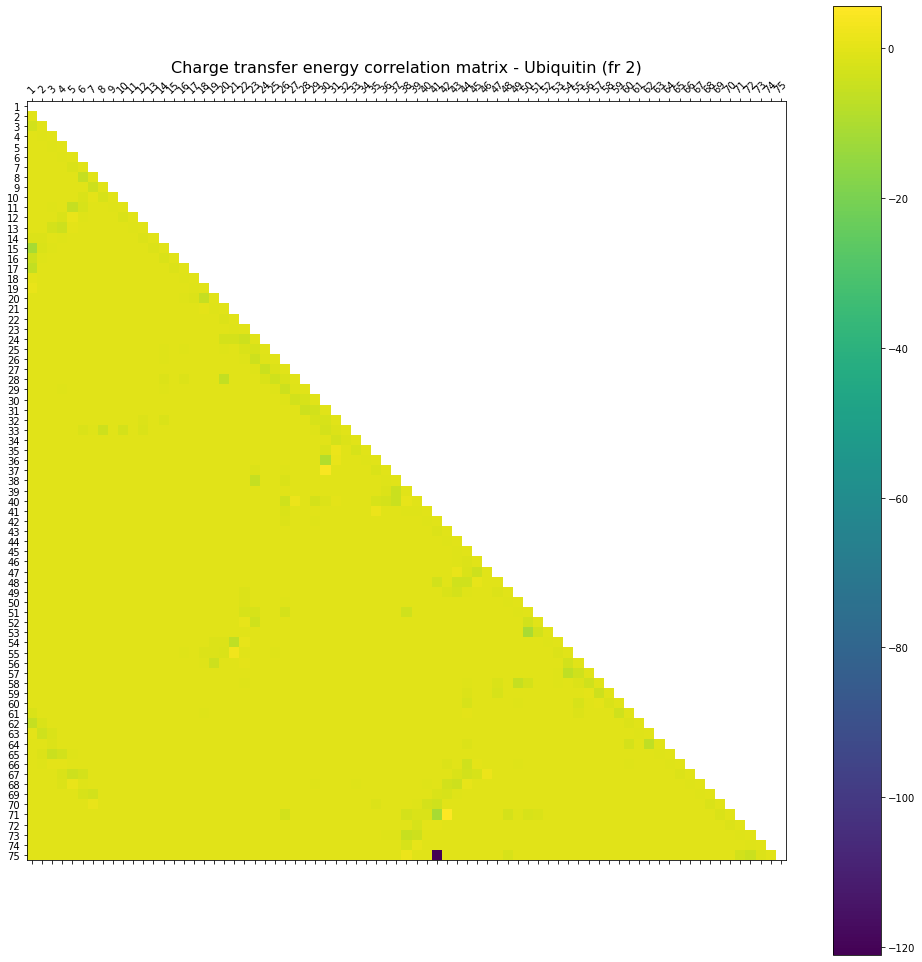

In [812]:
draw_map_df(df_map_neut_ect_nonc, 'Charge transfer energy correlation matrix - Ubiquitin (fr 2)')

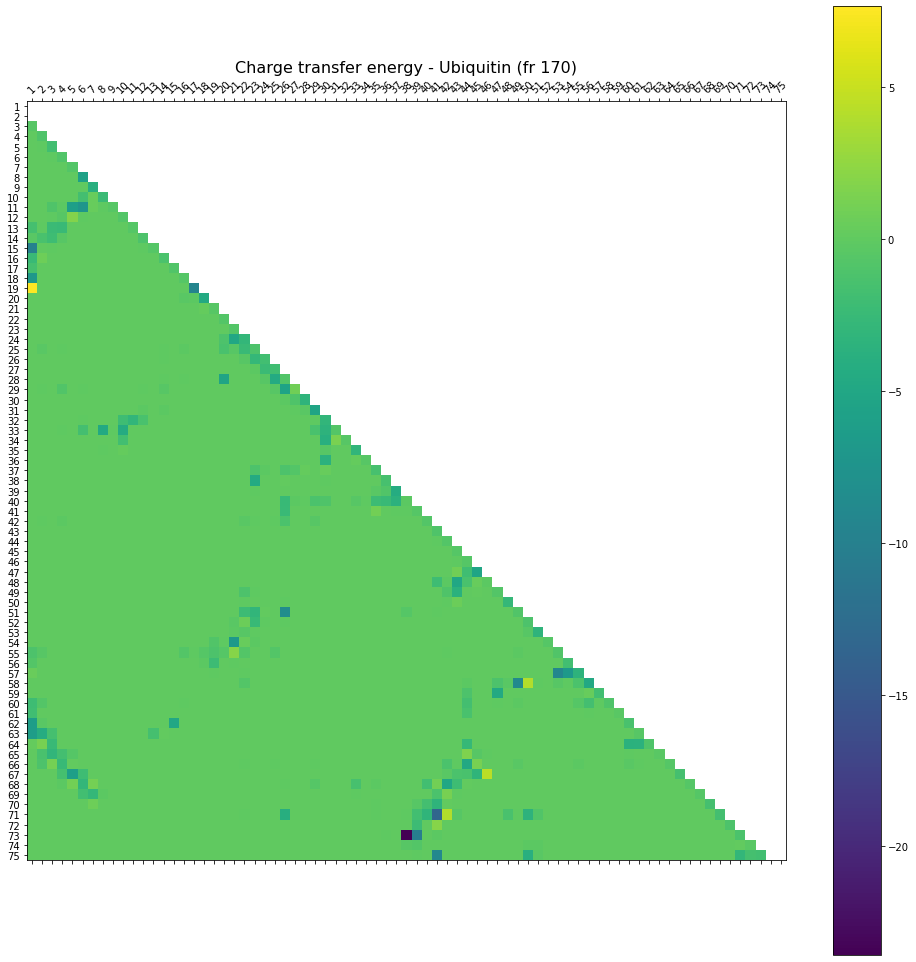

In [37]:
draw_map_df(df_map_neut_last1_ect_nonc, 'Charge transfer energy - Ubiquitin (fr 170)')

In [785]:
#draw_map_df(df_map_neut_last2_ect_nonc, 'Charge transfer energy - Ubiquitin (fr 164)')

#### +9

All interactions

In [817]:
#draw_map_df(df_map_9p_ect, 'Charge transfer energy - Ubiquitin +9 (fr 2)')

In [792]:
#draw_map_df(df_map_9p_last_ect, 'Charge transfer energy- Ubiquitin +9 (fr 170)')

Non-covalent interactions

In [808]:
#draw_map_df(df_map_9p_ect_nonc, 'Charge transfer energy - non-covalent interactions - Ubiquitin +9 (fr 2)')

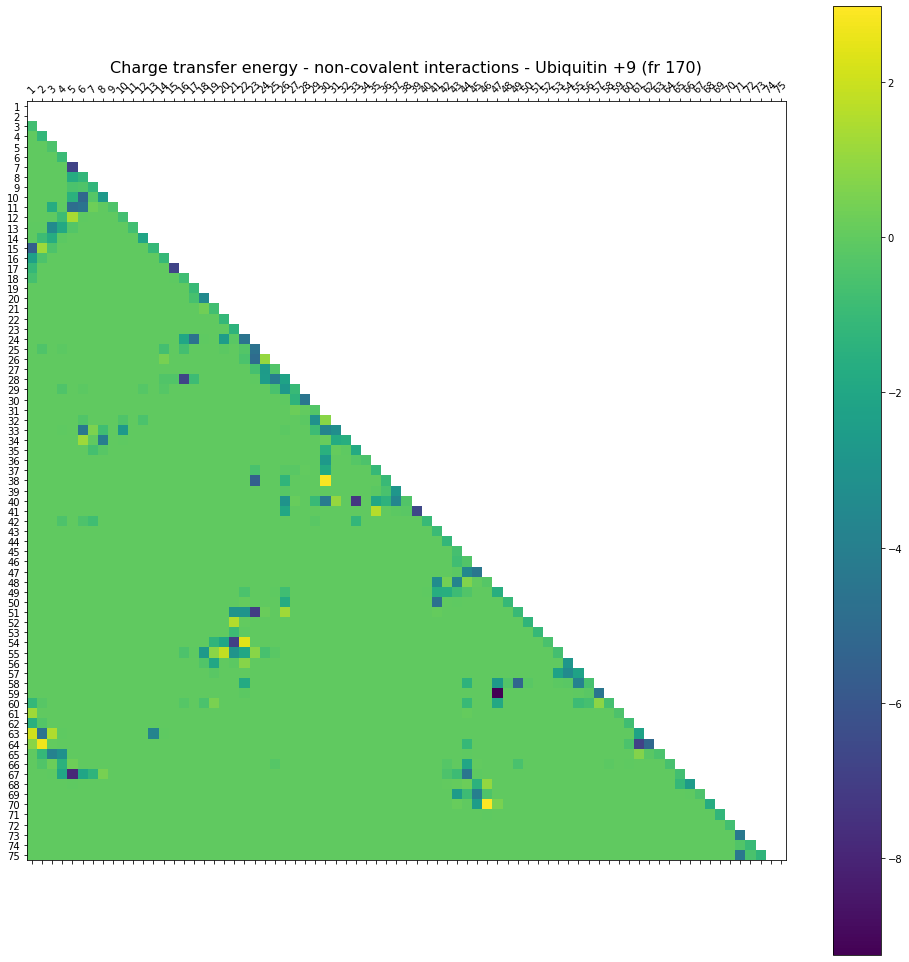

In [39]:
draw_map_df(df_map_9p_last_ect_nonc, 'Charge transfer energy - non-covalent interactions - Ubiquitin +9 (fr 170)')

#### +10

All interactions

In [736]:
#draw_map_df(df_map_10p_ect, 'Charge transfer energy - Ubiquitin +10 (fr 2)')

In [735]:
#draw_map_df(df_map_10p_last_ect, 'Charge transfer energy - Ubiquitin +10 (fr 164)')

Non-covalent interactions

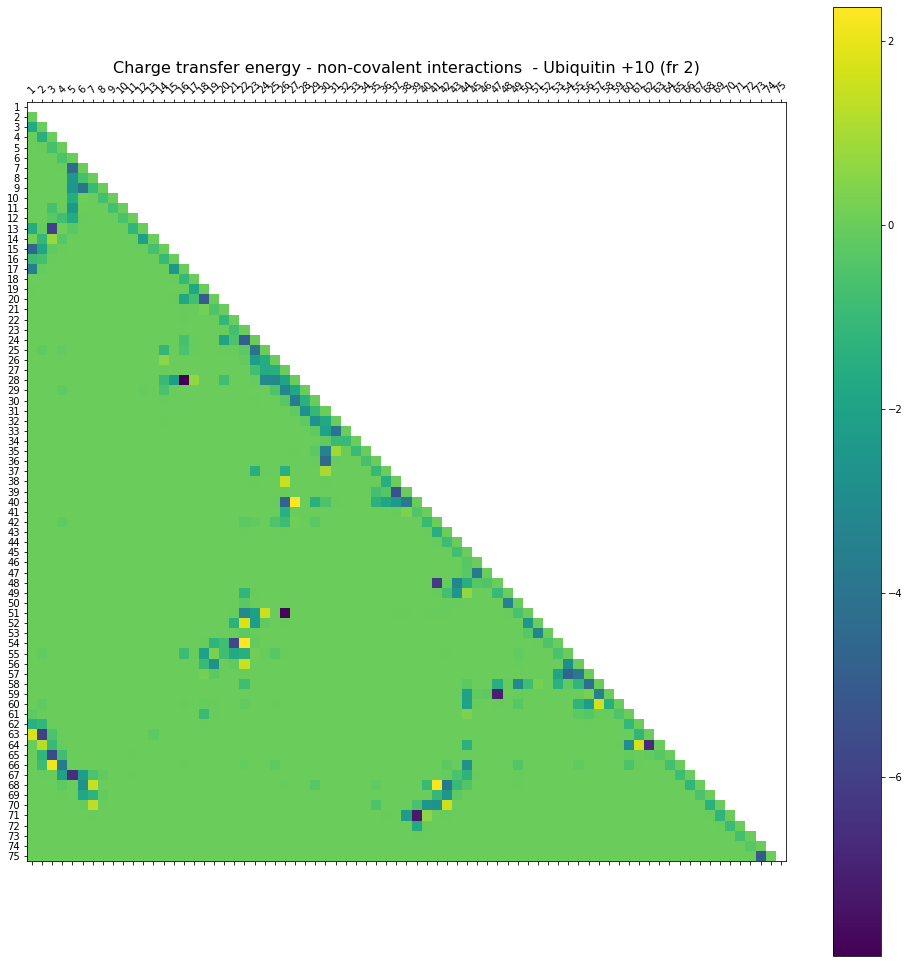

In [806]:
draw_map_df(df_map_10p_ect_nonc, 'Charge transfer energy - non-covalent interactions  - Ubiquitin +10 (fr 2)')

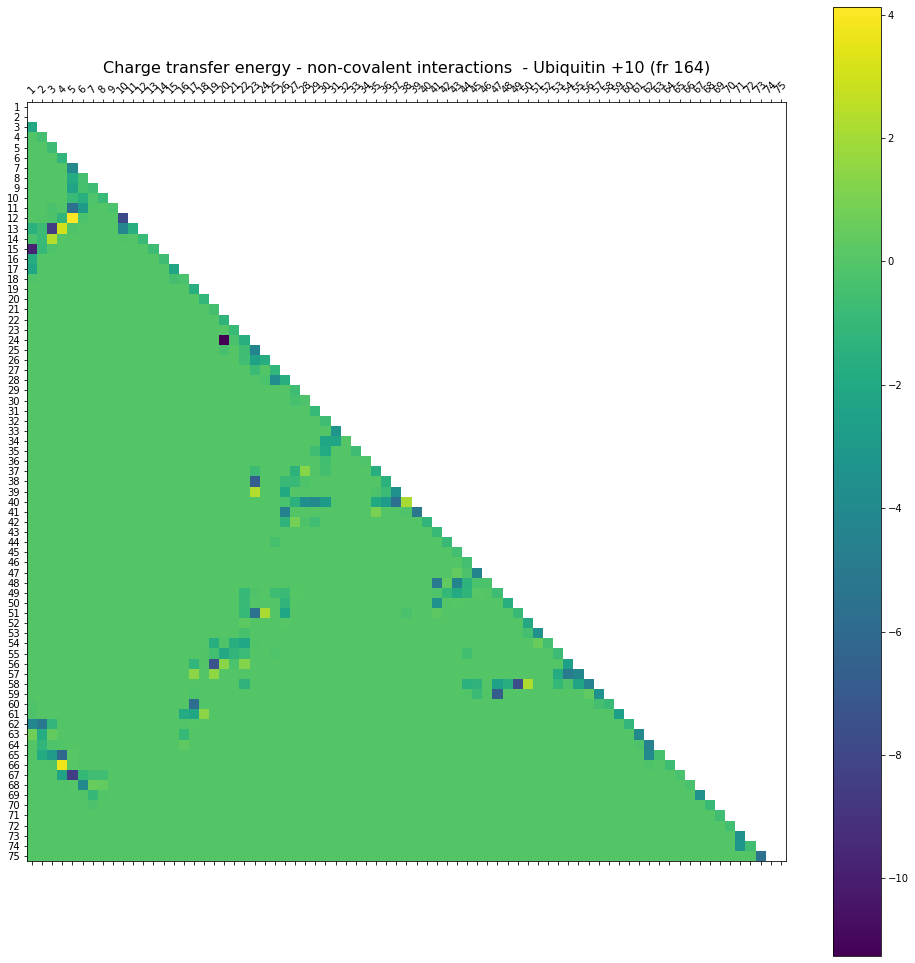

In [40]:
draw_map_df(df_map_10p_last_ect_nonc, 'Charge transfer energy - non-covalent interactions  - Ubiquitin +10 (fr 164)')

Text(0.5, 1.0, 'Charge transfer energy correlation matrix')

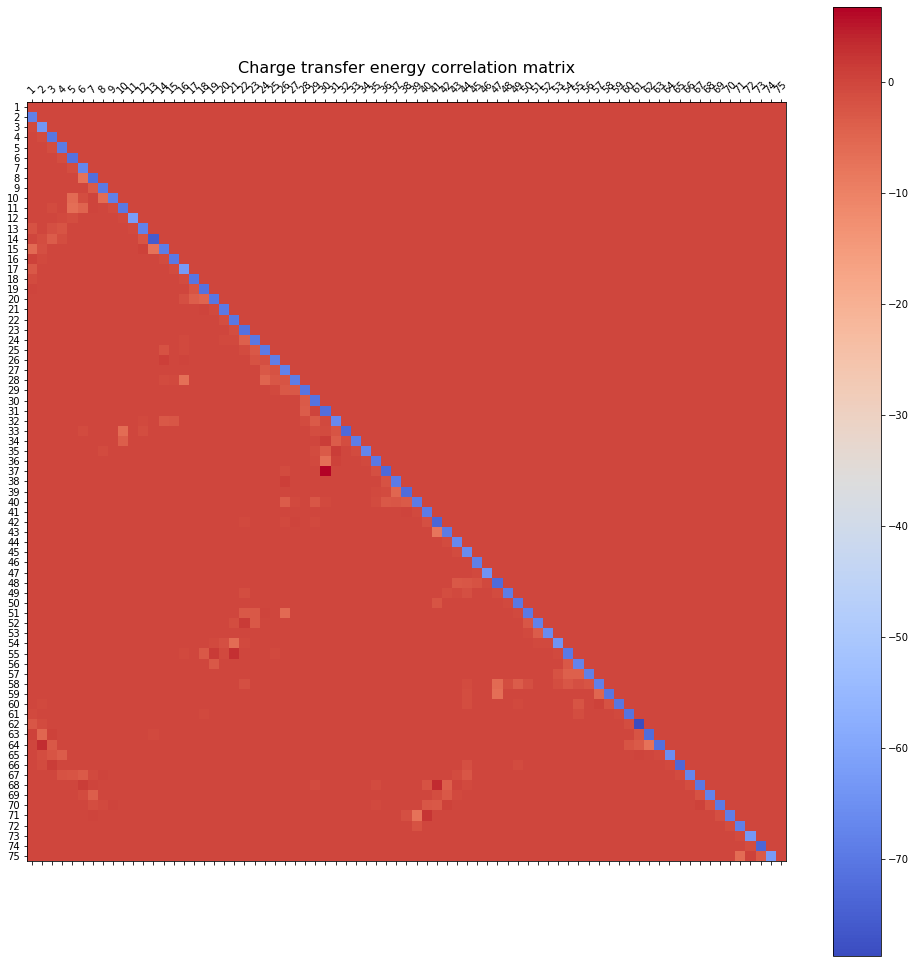

In [393]:
f = plt.figure(figsize=(17, 17))
plt.matshow(df_map_9p_ect, fignum=f.number, cmap = matplotlib.cm.get_cmap('coolwarm'), \
                         interpolation = 'nearest')
plt.xticks(range(df_map_9p_ect.select_dtypes(['number']).shape[1]), df_map_9p_ect.select_dtypes(['number']).columns + 1, fontsize=10, rotation=45)
plt.yticks(range(df_map_9p_ect.select_dtypes(['number']).shape[1]), df_map_9p_ect.select_dtypes(['number']).columns + 1, fontsize=10)

#ax = plt.subplot()
#im = ax.imshow(np.arange(100).reshape((10, 10)))
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.05)

cb = plt.colorbar()
cb.solids.set_edgecolor("face")
cb.ax.tick_params(labelsize=10)
plt.title('Charge transfer energy correlation matrix', fontsize=16)


#plt.colorbar(im, cax=cax)

In [263]:
#df_map_9p_ect.select_dtypes(['number']).shape[1]
df_map_9p_ect.select_dtypes(['number']).columns + 1

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
            69, 70, 71, 72, 73, 74, 75],
           dtype='int64')

In [84]:


f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);


plt.scatter(clean_sort_test[['R']],clean_sort_test[['Q(I->J)']])

plt.xlabel("R (nm)", fontsize=10)
plt.ylabel("Charge transfer (?)", fontsize=10)
plt.suptitle('Interfragment charge transfer', fontsize=12)
plt.title('only non-covalent interactions', fontsize=8)

KeyError: "None of [Index(['I', 'EIJ-EI-EJ'], dtype='object')] are in the [columns]"

### (?) vs. IFD

In [23]:
sort_test = sorting_info(get_one_frag_feat_info(data_FMO1_1, data_FMO2_1, 'I', 74), "R")
clean_sort_test = sort_test.loc[sort_test['R'] != 0]
clean_sort_test
#sort_test

,I,J,DL,Z,R,Q(I->J),EIJ-EI-EJ,dDIJ*VIJ,total,Ees,Eex,Ect+mix,Erc+di,Gsol
2626,73,71,C1,1,1.30,0.0045,29.364,-4.688,24.677,25.994,-0.009,-0.722,-0.586,0.0
2594,73,39,C1,0,1.64,-0.0000,0.786,-0.893,-0.107,-0.053,-0.001,-0.015,-0.037,0.0
2625,73,70,S1,0,2.10,0.0000,1.227,0.000,1.227,1.227,0.000,0.000,0.000,0.0
2562,73,7,S1,0,2.66,0.0000,0.497,0.000,0.497,0.497,0.000,0.000,0.000,0.0
2595,73,40,S1,0,2.70,0.0000,-0.456,0.000,-0.456,-0.456,0.000,0.000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,73,63,S1,0,9.41,0.0000,-0.024,0.000,-0.024,-0.024,0.000,0.000,0.000,0.0
2556,73,1,S1,0,9.44,0.0000,0.008,0.000,0.008,0.008,0.000,0.000,0.000,0.0
2617,73,62,S1,1,10.02,0.0000,8.154,0.000,8.154,8.154,0.000,0.000,0.000,0.0
2573,73,18,S1,0,10.03,0.0000,-0.267,0.000,-0.267,-0.267,0.000,0.000,0.000,0.0


In [24]:
data_FMO2_1

,I,J,DL,Z,R,Q(I->J),EIJ-EI-EJ,dDIJ*VIJ,total,Ees,Eex,Ect+mix,Erc+di,Gsol
0,2,1,C1,0,0.00,0.0058,-9540.366,0.849,-9539.517,-9293.737,-135.019,-68.270,-42.491,0.0
1,3,1,C1,0,1.30,0.0023,5.065,-3.061,2.005,3.280,-0.007,-0.610,-0.659,0.0
2,3,2,C1,0,0.00,-0.0304,-9530.519,1.821,-9528.698,-9288.856,-136.092,-63.559,-40.191,0.0
3,4,1,S1,0,2.08,0.0000,-0.579,0.000,-0.579,-0.579,0.000,0.000,0.000,0.0
4,4,2,C1,0,0.89,-0.0009,5.877,-4.372,1.505,2.495,1.726,-0.736,-1.980,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770,75,70,C1,0,1.54,0.0003,0.709,-0.276,0.433,0.746,-0.001,-0.109,-0.203,0.0
2771,75,71,C1,0,0.67,0.0156,-18.304,-2.034,-20.337,-26.149,16.735,-6.291,-4.632,0.0
2772,75,72,C1,0,0.75,-0.0354,-2.609,-4.725,-7.334,-11.023,8.184,0.511,-5.006,0.0
2773,75,73,C1,0,0.75,0.0237,4.733,-5.219,-0.486,0.031,6.285,-3.045,-3.757,0.0


Text(0.5, 1.0, 'only non-covalent interactions')

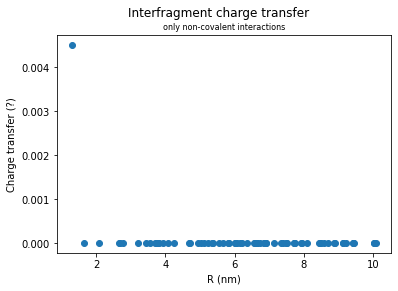

In [25]:
plt.scatter(clean_sort_test[['R']],clean_sort_test[['Q(I->J)']])

plt.xlabel("R (nm)", fontsize=10)
plt.ylabel("Charge transfer (?)", fontsize=10)
plt.suptitle('Interfragment charge transfer', fontsize=12)
plt.title('only non-covalent interactions', fontsize=8)

Text(0.5, 0.98, 'Interfragment charge transfer')

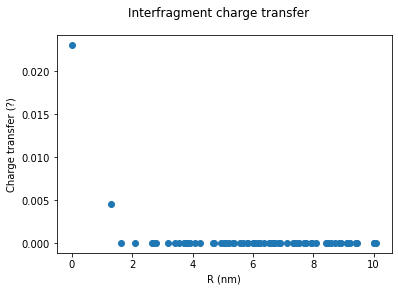

In [53]:
plt.scatter(sort_test[['R']],sort_test[['Q(I->J)']])

plt.xlabel("R (nm)", fontsize=10)
plt.ylabel("Charge transfer (?)", fontsize=10)
plt.suptitle('Interfragment charge transfer', fontsize=12)
#plt.title('', fontsize=8)

Text(0.5, 1.0, 'only non-covalent interactions')

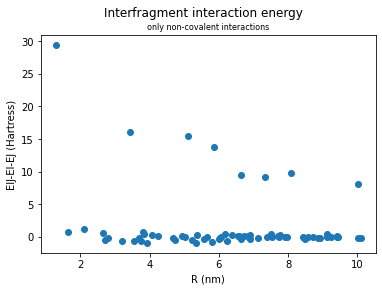

In [56]:
plt.scatter(clean_sort_test[['R']],clean_sort_test[['EIJ-EI-EJ']])

plt.xlabel("R (nm)", fontsize=10)
plt.ylabel("EIJ-EI-EJ (Hartress)", fontsize=10)
plt.suptitle('Interfragment interaction energy', fontsize=12)
plt.title('only non-covalent interactions', fontsize=8)

Text(0.5, 0.98, 'Interfragment interaction energy')

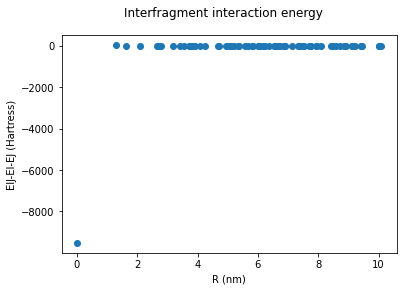

In [57]:
plt.scatter(sort_test[['R']],sort_test[['EIJ-EI-EJ']])
plt.xlabel("R (nm)", fontsize=10)
plt.ylabel("EIJ-EI-EJ (Hartress)", fontsize=10)
plt.suptitle('Interfragment interaction energy', fontsize=12)
#plt.title('', fontsize=8)

Text(0.5, 1.0, 'only non-covalent interactions')

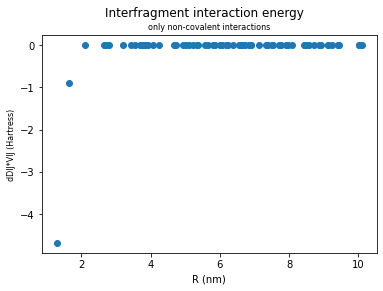

In [60]:
plt.scatter(clean_sort_test[['R']],clean_sort_test[['dDIJ*VIJ']])
plt.xlabel("R (nm)", fontsize=10)
plt.ylabel("dDIJ*VIJ (Hartress)", fontsize=8)
plt.suptitle('Interfragment interaction energy', fontsize=12)
plt.title('only non-covalent interactions', fontsize=8)

Text(0.5, 0.98, 'Interfragment interaction energy')

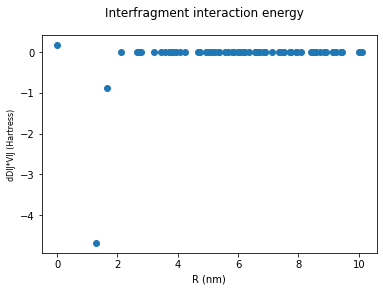

In [62]:
plt.scatter(sort_test[['R']],sort_test[['dDIJ*VIJ']])
plt.xlabel("R (nm)", fontsize=10)
plt.ylabel("dDIJ*VIJ (Hartress)", fontsize=8)
plt.suptitle('Interfragment interaction energy', fontsize=12)
#plt.title('only non-covalent interactions', fontsize=8)

Text(0.5, 1.0, 'only non-covalent interactions')

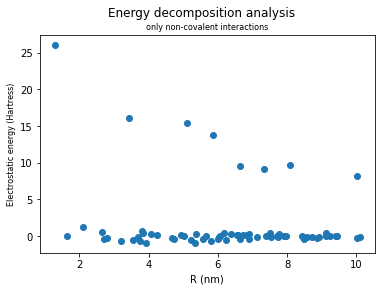

In [65]:
plt.scatter(clean_sort_test[['R']],clean_sort_test[['Ees']])
plt.xlabel("R (nm)", fontsize=10)
plt.ylabel("Electrostatic energy (Hartress)", fontsize=8)
plt.suptitle('Energy decomposition analysis', fontsize=12)
plt.title('only non-covalent interactions', fontsize=8)

Text(0.5, 0.98, 'Energy decomposition analysis')

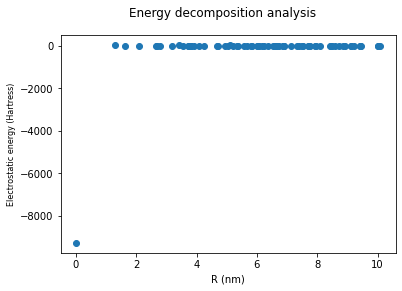

In [66]:
plt.scatter(sort_test[['R']],sort_test[['Ees']])
plt.xlabel("R (nm)", fontsize=10)
plt.ylabel("Electrostatic energy (Hartress)", fontsize=8)
plt.suptitle('Energy decomposition analysis', fontsize=12)
#plt.title('only non-covalent interactions', fontsize=8)

Text(0.5, 1.0, 'only non-covalent interactions')

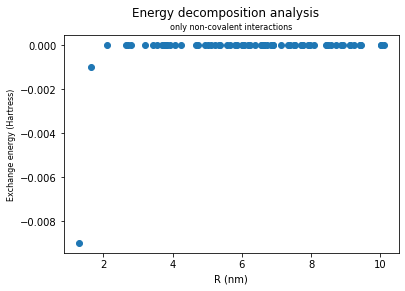

In [67]:
plt.scatter(clean_sort_test[['R']],clean_sort_test[['Eex']])
plt.xlabel("R (nm)", fontsize=10)
plt.ylabel("Exchange energy (Hartress)", fontsize=8)
plt.suptitle('Energy decomposition analysis', fontsize=12)
plt.title('only non-covalent interactions', fontsize=8)

Text(0.5, 0.98, 'Energy decomposition analysis')

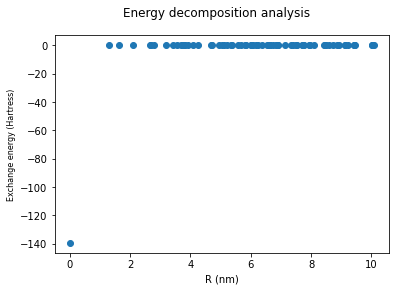

In [68]:
plt.scatter(sort_test[['R']],sort_test[['Eex']])
plt.xlabel("R (nm)", fontsize=10)
plt.ylabel("Exchange energy (Hartress)", fontsize=8)
plt.suptitle('Energy decomposition analysis', fontsize=12)
#plt.title('only non-covalent interactions', fontsize=8)

Text(0.5, 1.0, 'only non-covalent interactions')

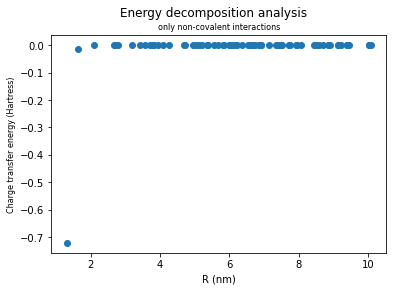

In [69]:
plt.scatter(clean_sort_test[['R']],clean_sort_test[['Ect+mix']])
plt.xlabel("R (nm)", fontsize=10)
plt.ylabel("Charge transfer energy (Hartress)", fontsize=8)
plt.suptitle('Energy decomposition analysis', fontsize=12)
plt.title('only non-covalent interactions', fontsize=8)

Text(0.5, 0.98, 'Energy decomposition analysis')

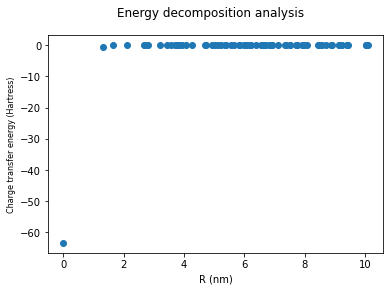

In [71]:
plt.scatter(sort_test[['R']],sort_test[['Ect+mix']])
plt.xlabel("R (nm)", fontsize=10)
plt.ylabel("Charge transfer energy (Hartress)", fontsize=8)
plt.suptitle('Energy decomposition analysis', fontsize=12)

___________________________

Finding correlation among terms

Text(0.5, 0.98, 'IFIE vs. Electrostatics')

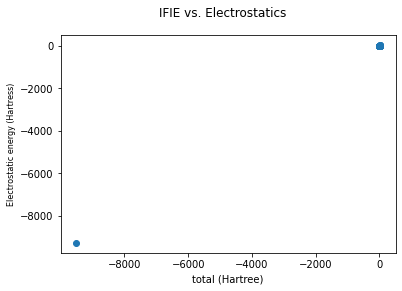

In [73]:
plt.scatter(sort_test[['total']],sort_test[['Ees']])
plt.xlabel("total (Hartree)", fontsize=10)
plt.ylabel("Electrostatic energy (Hartress)", fontsize=8)
plt.suptitle('IFIE vs. Electrostatics', fontsize=12)

In [74]:
sort_test[['total','Ees']].corr(method='pearson')

,total,Ees
total,1.0,1.0
Ees,1.0,1.0


Text(0.5, 1.0, 'only non-covalent interactions')

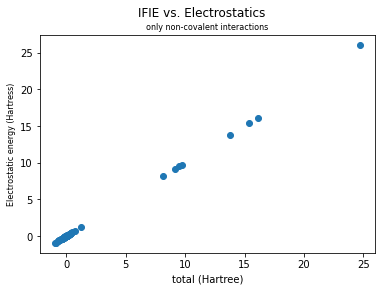

In [75]:
plt.scatter(clean_sort_test[['total']],clean_sort_test[['Ees']])
plt.xlabel("total (Hartree)", fontsize=10)
plt.ylabel("Electrostatic energy (Hartress)", fontsize=8)
plt.suptitle('IFIE vs. Electrostatics', fontsize=12)
plt.title('only non-covalent interactions', fontsize=8)

In [76]:
clean_sort_test[['total','Ees']].corr(method='pearson')

,total,Ees
total,1.000000,0.999651
Ees,0.999651,1.000000


In [77]:
clean_sort_test[['total','Ees']].corr(method='spearman')

,total,Ees
total,1.000000,0.999061
Ees,0.999061,1.000000


Text(0.5, 1.0, 'only non-covalent interactions')

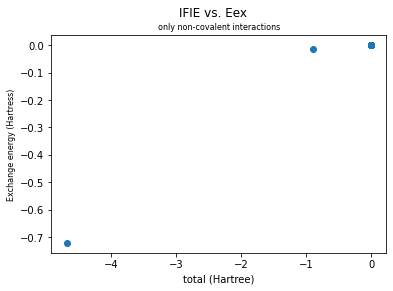

In [87]:
plt.scatter(clean_sort_test[['dDIJ*VIJ']],clean_sort_test[['Ect+mix']])
plt.xlabel("total (Hartree)", fontsize=10)
plt.ylabel("Exchange energy (Hartress)", fontsize=8)
plt.suptitle('IFIE vs. Eex', fontsize=12)
plt.title('only non-covalent interactions', fontsize=8)

In [84]:
clean_sort_test[['total','Ect+mix']].corr(method='pearson')

,total,Ect+mix
total,1.000000,-0.604637
Ect+mix,-0.604637,1.000000


In [27]:
sort_test

,I,J,DL,Z,R,Q(I->J),EIJ-EI-EJ,dDIJ*VIJ,total,Ees,Eex,Ect+mix,Erc+di,Gsol
2627,73,72,C1,0,0.00,0.0230,-9520.017,0.170,-9519.848,-9276.909,-139.457,-63.368,-40.113,0.0
2626,73,71,C1,1,1.30,0.0045,29.364,-4.688,24.677,25.994,-0.009,-0.722,-0.586,0.0
2594,73,39,C1,0,1.64,-0.0000,0.786,-0.893,-0.107,-0.053,-0.001,-0.015,-0.037,0.0
2625,73,70,S1,0,2.10,0.0000,1.227,0.000,1.227,1.227,0.000,0.000,0.000,0.0
2562,73,7,S1,0,2.66,0.0000,0.497,0.000,0.497,0.497,0.000,0.000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,73,63,S1,0,9.41,0.0000,-0.024,0.000,-0.024,-0.024,0.000,0.000,0.000,0.0
2556,73,1,S1,0,9.44,0.0000,0.008,0.000,0.008,0.008,0.000,0.000,0.000,0.0
2617,73,62,S1,1,10.02,0.0000,8.154,0.000,8.154,8.154,0.000,0.000,0.000,0.0
2573,73,18,S1,0,10.03,0.0000,-0.267,0.000,-0.267,-0.267,0.000,0.000,0.000,0.0


In [40]:
#sort_test.corr(method='pearson').style.background_gradient(cmap='bwr') #cmap='coolwarm' one-line command
sort_pearson = sort_test.corr(method='pearson')
sort_spearman = sort_test.corr(method='spearman')
nonc_pearson = clean_sort_test.corr(method='pearson')
nonc_spearman = clean_sort_test.corr(method='spearman')

In [35]:
sort_pearson.style.background_gradient(cmap='bwr')

,I,J,Z,R,Q(I->J),EIJ-EI-EJ,dDIJ*VIJ,total,Ees,Eex,Ect+mix,Erc+di,Gsol
I,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
J,nan,1.000000,0.053162,-0.103603,0.237408,-0.202247,-0.189240,-0.202347,-0.202309,-0.202734,-0.204990,-0.205635,nan
Z,nan,0.053162,1.000000,-0.039680,0.023337,0.045891,-0.323830,0.045730,0.045876,0.041938,0.038148,0.037098,nan
R,nan,-0.103603,-0.039680,1.000000,-0.366008,0.321206,0.283698,0.321357,0.321299,0.322107,0.325081,0.326068,nan
Q(I->J),nan,0.237408,0.023337,-0.366008,1.000000,-0.980715,-0.137640,-0.980811,-0.980771,-0.981309,-0.983425,-0.984001,nan
EIJ-EI-EJ,nan,-0.202247,0.045891,0.321206,-0.980715,1.000000,-0.055068,1.000000,1.000000,0.999990,0.999892,0.999840,nan
dDIJ*VIJ,nan,-0.189240,-0.323830,0.283698,-0.137640,-0.055068,1.000000,-0.054569,-0.054773,-0.052100,-0.040944,-0.037669,nan
total,nan,-0.202347,0.045730,0.321357,-0.980811,1.000000,-0.054569,1.000000,1.000000,0.999991,0.999899,0.999849,nan
Ees,nan,-0.202309,0.045876,0.321299,-0.980771,1.000000,-0.054773,1.000000,1.000000,0.999991,0.999895,0.999845,nan
Eex,nan,-0.202734,0.041938,0.322107,-0.981309,0.999990,-0.052100,0.999991,0.999991,1.000000,0.999936,0.999894,nan


In [34]:
sort_spearman.style.background_gradient(cmap='bwr')

,I,J,Z,R,Q(I->J),EIJ-EI-EJ,dDIJ*VIJ,total,Ees,Eex,Ect+mix,Erc+di,Gsol
I,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
J,nan,1.000000,0.053162,-0.041644,0.284693,0.118546,-0.008080,0.115491,0.116359,-0.245467,-0.245467,-0.245467,nan
Z,nan,0.053162,1.000000,-0.038278,0.205410,0.544388,-0.196537,0.544388,0.544388,-0.147402,-0.147402,-0.147402,nan
R,nan,-0.041644,-0.038278,1.000000,-0.284700,0.033540,0.108851,0.079220,0.068640,0.346244,0.346244,0.346244,nan
Q(I->J),nan,0.284693,0.205410,-0.284700,1.000000,-0.004010,0.011581,-0.004010,-0.004010,-0.822253,-0.822253,-0.822253,nan
EIJ-EI-EJ,nan,0.118546,0.544388,0.033540,-0.004010,1.000000,-0.320233,0.978583,0.986012,-0.082845,-0.082845,-0.082845,nan
dDIJ*VIJ,nan,-0.008080,-0.196537,0.108851,0.011581,-0.320233,1.000000,-0.203211,-0.225965,0.314378,0.314378,0.314378,nan
total,nan,0.115491,0.544388,0.079220,-0.004010,0.978583,-0.203211,1.000000,0.999100,0.034178,0.034178,0.034178,nan
Ees,nan,0.116359,0.544388,0.068640,-0.004010,0.986012,-0.225965,0.999100,1.000000,0.011424,0.011424,0.011424,nan
Eex,nan,-0.245467,-0.147402,0.346244,-0.822253,-0.082845,0.314378,0.034178,0.011424,1.000000,1.000000,1.000000,nan


In [44]:
nonc_pearson.style.background_gradient(cmap='coolwarm')

,I,J,Z,R,Q(I->J),EIJ-EI-EJ,dDIJ*VIJ,total,Ees,Eex,Ect+mix,Erc+di,Gsol
I,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
J,nan,1.000000,0.063032,-0.041323,0.204124,0.109531,-0.204330,0.092942,0.097837,-0.205130,-0.204504,-0.205005,nan
Z,nan,0.063032,1.000000,-0.056239,0.335410,0.893873,-0.322364,0.922849,0.915122,-0.329172,-0.334552,-0.332358,nan
R,nan,-0.041323,-0.056239,1.000000,-0.274047,-0.211094,0.317848,-0.188401,-0.193992,0.301056,0.279377,0.289862,nan
Q(I->J),nan,0.204124,0.335410,-0.274047,1.000000,0.673893,-0.982246,0.605419,0.626206,-0.993866,-0.999784,-0.998009,nan
EIJ-EI-EJ,nan,0.109531,0.893873,-0.211094,0.673893,1.000000,-0.660459,0.995783,0.997818,-0.668893,-0.673585,-0.672057,nan
dDIJ*VIJ,nan,-0.204330,-0.322364,0.317848,-0.982246,-0.660459,1.000000,-0.588788,-0.609580,0.996968,0.985932,0.992122,nan
total,nan,0.092942,0.922849,-0.188401,0.605419,0.995783,-0.588788,1.000000,0.999651,-0.598237,-0.604637,-0.602236,nan
Ees,nan,0.097837,0.915122,-0.193992,0.626206,0.997818,-0.609580,0.999651,1.000000,-0.619117,-0.625460,-0.623107,nan
Eex,nan,-0.205130,-0.329172,0.301056,-0.993866,-0.668893,0.996968,-0.598237,-0.619117,1.000000,0.995949,0.998862,nan


In [43]:
nonc_spearman.style.background_gradient(cmap='coolwarm')

,I,J,Z,R,Q(I->J),EIJ-EI-EJ,dDIJ*VIJ,total,Ees,Eex,Ect+mix,Erc+di,Gsol
I,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
J,nan,1.000000,0.063032,-0.000570,0.204124,0.166484,-0.159697,0.163298,0.164203,-0.159697,-0.159697,-0.159697,nan
Z,nan,0.063032,1.000000,-0.047818,0.335410,0.547727,-0.212319,0.547727,0.547727,-0.212319,-0.212319,-0.212319,nan
R,nan,-0.000570,-0.047818,1.000000,-0.204129,-0.007881,0.286642,0.039757,0.028723,0.286642,0.286642,0.286642,nan
Q(I->J),nan,0.204124,0.335410,-0.204129,1.000000,0.204126,-0.712140,0.204126,0.204126,-0.712140,-0.712140,-0.712140,nan
EIJ-EI-EJ,nan,0.166484,0.547727,-0.007881,0.204126,1.000000,-0.253879,0.977666,0.985412,-0.253879,-0.253879,-0.253879,nan
dDIJ*VIJ,nan,-0.159697,-0.212319,0.286642,-0.712140,-0.253879,1.000000,-0.106465,-0.135129,1.000000,1.000000,1.000000,nan
total,nan,0.163298,0.547727,0.039757,0.204126,0.977666,-0.106465,1.000000,0.999061,-0.106465,-0.106465,-0.106465,nan
Ees,nan,0.164203,0.547727,0.028723,0.204126,0.985412,-0.135129,0.999061,1.000000,-0.135129,-0.135129,-0.135129,nan
Eex,nan,-0.159697,-0.212319,0.286642,-0.712140,-0.253879,1.000000,-0.106465,-0.135129,1.000000,1.000000,1.000000,nan


Text(0.5, 1.0, 'only non-covalent interactions')

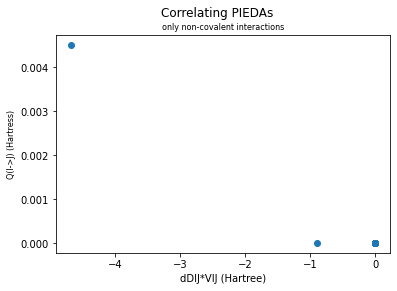

In [45]:
plt.scatter(clean_sort_test[['dDIJ*VIJ']],clean_sort_test[['Q(I->J)']])
plt.xlabel("dDIJ*VIJ (Hartree)", fontsize=10)
plt.ylabel("Q(I->J) (Hartress)", fontsize=8)
plt.suptitle('Correlating PIEDAs', fontsize=12)
plt.title('only non-covalent interactions', fontsize=8)

In [56]:
clean_sort_test.drop(columns=['Gsol'])

,I,J,DL,Z,R,Q(I->J),EIJ-EI-EJ,dDIJ*VIJ,total,Ees,Eex,Ect+mix,Erc+di
2626,73,71,C1,1,1.30,0.0045,29.364,-4.688,24.677,25.994,-0.009,-0.722,-0.586
2594,73,39,C1,0,1.64,-0.0000,0.786,-0.893,-0.107,-0.053,-0.001,-0.015,-0.037
2625,73,70,S1,0,2.10,0.0000,1.227,0.000,1.227,1.227,0.000,0.000,0.000
2562,73,7,S1,0,2.66,0.0000,0.497,0.000,0.497,0.497,0.000,0.000,0.000
2595,73,40,S1,0,2.70,0.0000,-0.456,0.000,-0.456,-0.456,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,73,63,S1,0,9.41,0.0000,-0.024,0.000,-0.024,-0.024,0.000,0.000,0.000
2556,73,1,S1,0,9.44,0.0000,0.008,0.000,0.008,0.008,0.000,0.000,0.000
2617,73,62,S1,1,10.02,0.0000,8.154,0.000,8.154,8.154,0.000,0.000,0.000
2573,73,18,S1,0,10.03,0.0000,-0.267,0.000,-0.267,-0.267,0.000,0.000,0.000


In [76]:
clean_sort_test

,I,J,DL,Z,R,Q(I->J),EIJ-EI-EJ,dDIJ*VIJ,total,Ees,Eex,Ect+mix,Erc+di,Gsol
2626,73,71,C1,1,1.30,0.0045,29.364,-4.688,24.677,25.994,-0.009,-0.722,-0.586,0.0
2594,73,39,C1,0,1.64,-0.0000,0.786,-0.893,-0.107,-0.053,-0.001,-0.015,-0.037,0.0
2625,73,70,S1,0,2.10,0.0000,1.227,0.000,1.227,1.227,0.000,0.000,0.000,0.0
2562,73,7,S1,0,2.66,0.0000,0.497,0.000,0.497,0.497,0.000,0.000,0.000,0.0
2595,73,40,S1,0,2.70,0.0000,-0.456,0.000,-0.456,-0.456,0.000,0.000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,73,63,S1,0,9.41,0.0000,-0.024,0.000,-0.024,-0.024,0.000,0.000,0.000,0.0
2556,73,1,S1,0,9.44,0.0000,0.008,0.000,0.008,0.008,0.000,0.000,0.000,0.0
2617,73,62,S1,1,10.02,0.0000,8.154,0.000,8.154,8.154,0.000,0.000,0.000,0.0
2573,73,18,S1,0,10.03,0.0000,-0.267,0.000,-0.267,-0.267,0.000,0.000,0.000,0.0


In [105]:
select_feat = clean_sort_test[['EIJ-EI-EJ','dDIJ*VIJ','total','Ees','Eex','Ect+mix','Erc+di']]

Guess: Converting as logarithmic function

In [106]:
#pd.DataFrame([np.log(clean_sort_test['EIJ-EI-EJ']),np.log(clean_sort_test['dDIJ*VIJ']),np.log(clean_sort_test.total),np.log(clean_sort_test.Ees),np.log(clean_sort_test.Eex),np.log(clean_sort_test['Ect+mix']),np.log(clean_sort_test['Erc+di'])])
log_data = pd.DataFrame(np.log(select_feat))#.dropna()

In [107]:
log_data['R'] = clean_sort_test.R

In [108]:
log_spearman = log_data.dropna().corr(method='spearman')
log_pearson = log_data.dropna().corr(method='pearson')

In [109]:
log_pearson.style.background_gradient(cmap='coolwarm')

/home/carlos/.local/lib/python3.8/site-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/home/carlos/.local/lib/python3.8/site-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,EIJ-EI-EJ,dDIJ*VIJ,total,Ees,Eex,Ect+mix,Erc+di,R
EIJ-EI-EJ,1.000000,nan,1.000000,1.000000,nan,nan,nan,-0.237423
dDIJ*VIJ,nan,nan,nan,nan,nan,nan,nan,nan
total,1.000000,nan,1.000000,1.000000,nan,nan,nan,-0.237423
Ees,1.000000,nan,1.000000,1.000000,nan,nan,nan,-0.237423
Eex,nan,nan,nan,nan,nan,nan,nan,nan
Ect+mix,nan,nan,nan,nan,nan,nan,nan,nan
Erc+di,nan,nan,nan,nan,nan,nan,nan,nan
R,-0.237423,nan,-0.237423,-0.237423,nan,nan,nan,1.000000


In [120]:
select_feat = clean_sort_test[['EIJ-EI-EJ','dDIJ*VIJ','total','Ees','Eex','Ect+mix','Erc+di','R']]

In [121]:
select_spearman = select_feat.dropna().corr(method='spearman')
select_pearson = select_feat.dropna().corr(method='pearson')

In [122]:
select_pearson.style.background_gradient(cmap='coolwarm')

,EIJ-EI-EJ,dDIJ*VIJ,total,Ees,Eex,Ect+mix,Erc+di,R
EIJ-EI-EJ,1.000000,-0.660459,0.995783,0.997818,-0.668893,-0.673585,-0.672057,-0.211094
dDIJ*VIJ,-0.660459,1.000000,-0.588788,-0.609580,0.996968,0.985932,0.992122,0.317848
total,0.995783,-0.588788,1.000000,0.999651,-0.598237,-0.604637,-0.602236,-0.188401
Ees,0.997818,-0.609580,0.999651,1.000000,-0.619117,-0.625460,-0.623107,-0.193992
Eex,-0.668893,0.996968,-0.598237,-0.619117,1.000000,0.995949,0.998862,0.301056
Ect+mix,-0.673585,0.985932,-0.604637,-0.625460,0.995949,1.000000,0.999104,0.279377
Erc+di,-0.672057,0.992122,-0.602236,-0.623107,0.998862,0.999104,1.000000,0.289862
R,-0.211094,0.317848,-0.188401,-0.193992,0.301056,0.279377,0.289862,1.000000


In [129]:
log_data.dropna()

,EIJ-EI-EJ,dDIJ*VIJ,total,Ees,Eex,Ect+mix,Erc+di,R
2625,0.204572,-inf,0.204572,0.204572,-inf,-inf,-inf,2.10
2562,-0.699165,-inf,-0.699165,-0.699165,-inf,-inf,-inf,2.66
2596,2.778633,-inf,2.778633,2.778633,-inf,-inf,-inf,3.43
2591,-0.356675,-inf,-0.356675,-0.356675,-inf,-inf,-inf,3.80
2623,-0.921303,-inf,-0.921303,-0.921303,-inf,-inf,-inf,3.83
...,...,...,...,...,...,...,...,...
2608,2.273774,-inf,2.273774,2.273774,-inf,-inf,-inf,8.08
2616,-0.867501,-inf,-0.867501,-0.867501,-inf,-inf,-inf,9.13
2612,-2.864704,-inf,-2.864704,-2.864704,-inf,-inf,-inf,9.41
2556,-4.828314,-inf,-4.828314,-4.828314,-inf,-inf,-inf,9.44


Guess: linearization of logarithmic behavior

In [137]:
select_feat = clean_sort_test[['EIJ-EI-EJ','dDIJ*VIJ','total','Ees','Eex','Ect+mix','Erc+di']]

In [138]:
exp_data = pd.DataFrame(np.exp(select_feat))

In [140]:
exp_data['R'] = clean_sort_test.R

In [141]:
exp_data

,EIJ-EI-EJ,dDIJ*VIJ,total,Ees,Eex,Ect+mix,Erc+di,R
2626,5.657482e+12,0.009205,5.212966e+10,1.945587e+11,0.99104,0.485780,0.556549,1.30
2594,2.194600e+00,0.409426,8.985257e-01,9.483800e-01,0.99900,0.985112,0.963676,1.64
2625,3.410981e+00,1.000000,3.410981e+00,3.410981e+00,1.00000,1.000000,1.000000,2.10
2562,1.643783e+00,1.000000,1.643783e+00,1.643783e+00,1.00000,1.000000,1.000000,2.66
2595,6.338138e-01,1.000000,6.338138e-01,6.338138e-01,1.00000,1.000000,1.000000,2.70
...,...,...,...,...,...,...,...,...
2618,9.762857e-01,1.000000,9.762857e-01,9.762857e-01,1.00000,1.000000,1.000000,9.41
2556,1.008032e+00,1.000000,1.008032e+00,1.008032e+00,1.00000,1.000000,1.000000,9.44
2617,3.477260e+03,1.000000,3.477260e+03,3.477260e+03,1.00000,1.000000,1.000000,10.02
2573,7.656731e-01,1.000000,7.656731e-01,7.656731e-01,1.00000,1.000000,1.000000,10.03


In [143]:
exp_spearman = exp_data.dropna().corr(method='spearman')
exp_pearson = exp_data.dropna().corr(method='pearson')

In [144]:
exp_pearson.style.background_gradient(cmap='coolwarm')

,EIJ-EI-EJ,dDIJ*VIJ,total,Ees,Eex,Ect+mix,Erc+di,R
EIJ-EI-EJ,1.000000,-0.857070,1.000000,1.000000,-0.993817,-0.999581,-0.996655,-0.274047
dDIJ*VIJ,-0.857070,1.000000,-0.857067,-0.857069,0.908974,0.871625,0.896307,0.368531
total,1.000000,-0.857067,1.000000,1.000000,-0.993816,-0.999581,-0.996655,-0.274085
Ees,1.000000,-0.857069,1.000000,1.000000,-0.993817,-0.999581,-0.996655,-0.274057
Eex,-0.993817,0.908974,-0.993816,-0.993817,1.000000,0.996615,0.999567,0.301157
Ect+mix,-0.999581,0.871625,-0.999581,-0.999581,0.996615,1.000000,0.998603,0.281442
Erc+di,-0.996655,0.896307,-0.996655,-0.996655,0.999567,0.998603,1.000000,0.294331
R,-0.274047,0.368531,-0.274085,-0.274057,0.301157,0.281442,0.294331,1.000000


In [145]:
#select_feat.dropna()
#log_data[['dDIJ*VIJ']]
sort_test

,I,J,DL,Z,R,Q(I->J),EIJ-EI-EJ,dDIJ*VIJ,total,Ees,Eex,Ect+mix,Erc+di,Gsol
2627,73,72,C1,0,0.00,0.0230,-9520.017,0.170,-9519.848,-9276.909,-139.457,-63.368,-40.113,0.0
2626,73,71,C1,1,1.30,0.0045,29.364,-4.688,24.677,25.994,-0.009,-0.722,-0.586,0.0
2594,73,39,C1,0,1.64,-0.0000,0.786,-0.893,-0.107,-0.053,-0.001,-0.015,-0.037,0.0
2625,73,70,S1,0,2.10,0.0000,1.227,0.000,1.227,1.227,0.000,0.000,0.000,0.0
2562,73,7,S1,0,2.66,0.0000,0.497,0.000,0.497,0.497,0.000,0.000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,73,63,S1,0,9.41,0.0000,-0.024,0.000,-0.024,-0.024,0.000,0.000,0.000,0.0
2556,73,1,S1,0,9.44,0.0000,0.008,0.000,0.008,0.008,0.000,0.000,0.000,0.0
2617,73,62,S1,1,10.02,0.0000,8.154,0.000,8.154,8.154,0.000,0.000,0.000,0.0
2573,73,18,S1,0,10.03,0.0000,-0.267,0.000,-0.267,-0.267,0.000,0.000,0.000,0.0


Text(0.5, 1.0, 'only non-covalent interactions')

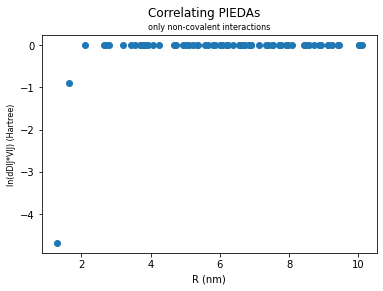

In [134]:
plt.scatter(select_feat[['R']],select_feat[['dDIJ*VIJ']])
plt.xlabel("R (nm)", fontsize=10)
plt.ylabel("ln(dDIJ*VIJ) (Hartree)", fontsize=8)
plt.suptitle('Correlating PIEDAs', fontsize=12)
plt.title('only non-covalent interactions', fontsize=8)

____________________________________

### (?feature)/IFIE vs. IFD

#### creating relative features with respec to to the IFIE

In [28]:
#clean_sort_test['total'].abs().max()
clean_sort_test

,I,J,DL,Z,R,Q(I->J),EIJ-EI-EJ,dDIJ*VIJ,total,Ees,Eex,Ect+mix,Erc+di,Gsol
2626,73,71,C1,1,1.30,0.0045,29.364,-4.688,24.677,25.994,-0.009,-0.722,-0.586,0.0
2594,73,39,C1,0,1.64,-0.0000,0.786,-0.893,-0.107,-0.053,-0.001,-0.015,-0.037,0.0
2625,73,70,S1,0,2.10,0.0000,1.227,0.000,1.227,1.227,0.000,0.000,0.000,0.0
2562,73,7,S1,0,2.66,0.0000,0.497,0.000,0.497,0.497,0.000,0.000,0.000,0.0
2595,73,40,S1,0,2.70,0.0000,-0.456,0.000,-0.456,-0.456,0.000,0.000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,73,63,S1,0,9.41,0.0000,-0.024,0.000,-0.024,-0.024,0.000,0.000,0.000,0.0
2556,73,1,S1,0,9.44,0.0000,0.008,0.000,0.008,0.008,0.000,0.000,0.000,0.0
2617,73,62,S1,1,10.02,0.0000,8.154,0.000,8.154,8.154,0.000,0.000,0.000,0.0
2573,73,18,S1,0,10.03,0.0000,-0.267,0.000,-0.267,-0.267,0.000,0.000,0.000,0.0


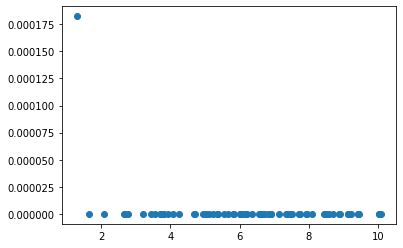

In [29]:
plt.scatter(clean_sort_test[['R']],clean_sort_test[['Q(I->J)']]/clean_sort_test['total'].abs().max())

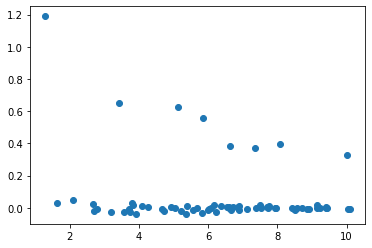

In [30]:
plt.scatter(clean_sort_test[['R']],clean_sort_test[['EIJ-EI-EJ']]/clean_sort_test['total'].abs().max())

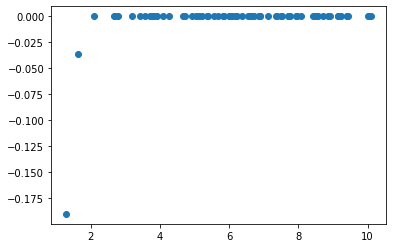

In [32]:
plt.scatter(clean_sort_test[['R']],clean_sort_test[['dDIJ*VIJ']]/clean_sort_test['total'].abs().max())

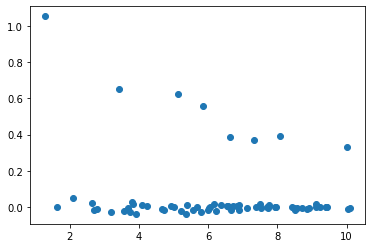

In [33]:
plt.scatter(clean_sort_test[['R']],clean_sort_test[['Ees']]/clean_sort_test['total'].abs().max())

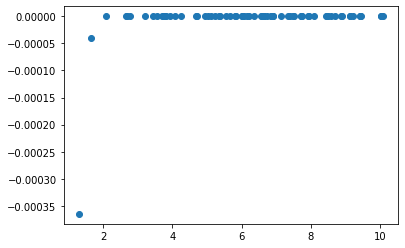

In [34]:
plt.scatter(clean_sort_test[['R']],clean_sort_test[['Eex']]/clean_sort_test['total'].abs().max())

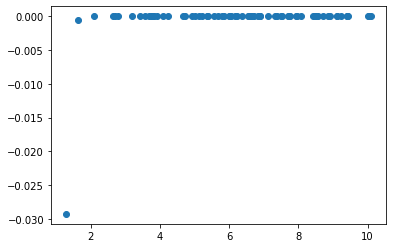

In [187]:
plt.scatter(clean_sort_test[['R']],clean_sort_test[['Ect+mix']]/clean_sort_test['total'].abs().max())

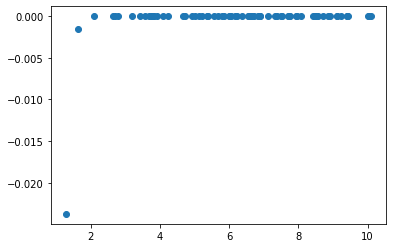

In [188]:
plt.scatter(clean_sort_test[['R']],clean_sort_test[['Erc+di']]/clean_sort_test['total'].abs().max())

In [35]:
sorting_info(get_one_frag_feat_info(data_FMO1_1, data_FMO2_1, 'I', 74), "Ect+mix")

,I,J,DL,Z,R,Q(I->J),EIJ-EI-EJ,dDIJ*VIJ,total,Ees,Eex,Ect+mix,Erc+di,Gsol
2627,73,72,C1,0,0.00,0.0230,-9520.017,0.170,-9519.848,-9276.909,-139.457,-63.368,-40.113,0.0
2626,73,71,C1,1,1.30,0.0045,29.364,-4.688,24.677,25.994,-0.009,-0.722,-0.586,0.0
2594,73,39,C1,0,1.64,-0.0000,0.786,-0.893,-0.107,-0.053,-0.001,-0.015,-0.037,0.0
2624,73,69,S1,0,2.79,0.0000,-0.212,0.000,-0.212,-0.212,0.000,0.000,0.000,0.0
2593,73,38,S1,0,3.20,0.0000,-0.704,0.000,-0.704,-0.704,0.000,0.000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,73,22,S1,0,6.61,0.0000,0.032,0.000,0.032,0.032,0.000,0.000,0.000,0.0
2576,73,21,S1,0,8.58,0.0000,-0.081,0.000,-0.081,-0.081,0.000,0.000,0.000,0.0
2575,73,20,S1,0,9.13,0.0000,-0.020,0.000,-0.020,-0.020,0.000,0.000,0.000,0.0
2581,73,26,S1,0,5.03,0.0000,0.034,0.000,0.034,0.034,0.000,0.000,0.000,0.0


### Charge transfer

In [37]:
data_FMO2_2

,IFG,QFG,Delta Q =,JFG ->,Q(JFG ->),2nd-J,2nd-QJ,3rd-J,3rd-QJ,4th-J,4th-QJ
0,1,0,0.0345,16,0.0310,63,0.0271,17,-0.0211,61,-0.0185
1,2,0,-0.0590,15,-0.0427,63,0.0378,3,-0.0304,65,-0.0189
2,3,0,0.0706,14,0.0458,64,-0.0327,2,0.0304,4,0.0223
3,4,0,0.0270,66,0.0333,65,0.0294,5,0.0266,13,-0.0245
4,5,1,-0.1042,10,-0.0710,11,-0.0377,6,0.0338,12,0.0316
...,...,...,...,...,...,...,...,...,...,...,...
70,71,1,-0.0785,39,-0.0766,70,-0.0368,72,0.0244,75,0.0156
71,72,0,-0.0123,75,-0.0354,39,0.0247,71,-0.0244,73,0.0230
72,73,1,-0.0376,74,-0.0339,75,0.0237,72,-0.0230,71,-0.0045
73,74,0,0.0581,73,0.0339,75,0.0253,72,-0.0010,0,0.0000


In [38]:
sorting_info(data_FMO2_2, "Delta Q =")

,IFG,QFG,Delta Q =,JFG ->,Q(JFG ->),2nd-J,2nd-QJ,3rd-J,3rd-QJ,4th-J,4th-QJ
46,47,1,-0.1873,59,-0.1015,46,-0.0609,58,-0.0573,48,0.0304
27,28,1,-0.1561,16,-0.0746,24,-0.0639,30,0.0385,27,-0.0378
9,10,1,-0.1554,9,-0.0891,5,0.0710,33,-0.0697,8,-0.0618
40,41,1,-0.1264,43,-0.0853,42,0.0468,70,-0.0348,50,-0.0328
4,5,1,-0.1042,10,-0.0710,11,-0.0377,6,0.0338,12,0.0316
...,...,...,...,...,...,...,...,...,...,...,...
2,3,0,0.0706,14,0.0458,64,-0.0327,2,0.0304,4,0.0223
51,52,0,0.0750,53,0.0520,23,0.0474,50,-0.0317,51,-0.0227
47,48,0,0.0780,44,0.0613,47,-0.0304,49,0.0289,43,0.0258
60,61,0,0.0898,62,0.1336,64,-0.0359,60,-0.0243,63,-0.0192


In [44]:
pd.set_option("display.max_rows", 35)
sorting_info(data_FMO2_2, "Delta Q =").head(15).append(sorting_info(data_FMO2_2, "Delta Q =").tail(15))

/tmp/ipykernel_84088/4101704903.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sorting_info(data_FMO2_2, "Delta Q =").head(15).append(sorting_info(data_FMO2_2, "Delta Q =").tail(15))


,IFG,QFG,Delta Q =,JFG ->,Q(JFG ->),2nd-J,2nd-QJ,3rd-J,3rd-QJ,4th-J,4th-QJ
46,47,1,-0.1873,59,-0.1015,46,-0.0609,58,-0.0573,48,0.0304
27,28,1,-0.1561,16,-0.0746,24,-0.0639,30,0.0385,27,-0.0378
9,10,1,-0.1554,9,-0.0891,5,0.0710,33,-0.0697,8,-0.0618
40,41,1,-0.1264,43,-0.0853,42,0.0468,70,-0.0348,50,-0.0328
4,5,1,-0.1042,10,-0.0710,11,-0.0377,6,0.0338,12,0.0316
52,53,1,-0.1027,52,-0.0520,51,-0.0319,57,-0.0298,54,0.0205
61,62,1,-0.0819,61,-0.1336,64,0.0735,63,-0.0186,60,-0.0071
70,71,1,-0.0785,39,-0.0766,70,-0.0368,72,0.0244,75,0.0156
1,2,0,-0.0590,15,-0.0427,63,0.0378,3,-0.0304,65,-0.0189
13,14,0,-0.0499,3,-0.0458,26,-0.0188,13,-0.0181,12,0.0163


In [53]:
#get_one_frag_feat_info(data_FMO1_1, data_FMO2_1, 'I', 48)

In [65]:
plot_test = sorting_info(get_one_frag_feat_info(data_FMO1_1, data_FMO2_1, 'I', 29), "Ect+mix").head(10)
plot_test

,I,J,DL,Z,R,Q(I->J),EIJ-EI-EJ,dDIJ*VIJ,total,Ees,Eex,Ect+mix,Erc+di,Gsol
377,28,27,C1,0,0.00,0.0378,-9508.328,-0.167,-9508.495,-9265.799,-134.561,-68.828,-39.308,0.0
366,28,16,C1,0,0.63,0.0746,-55.088,1.234,-53.854,-60.281,19.739,-6.928,-6.384,0.0
374,28,24,C1,0,0.66,0.0639,-37.409,0.234,-37.176,-41.208,13.654,-4.897,-4.725,0.0
375,28,25,C1,0,0.79,0.0318,-19.999,-1.574,-21.573,-19.343,4.511,-2.506,-4.235,0.0
376,28,26,C1,0,0.89,0.0270,-1.369,-3.946,-5.315,-4.874,5.791,-2.277,-3.955,0.0
364,28,14,C1,0,0.92,-0.0019,-0.034,-0.922,-0.956,-0.960,4.344,-0.935,-3.405,0.0
365,28,15,C1,0,1.43,0.0020,5.056,-0.209,4.848,5.813,0.009,-0.443,-0.532,0.0
370,28,20,C1,0,1.47,0.0004,-6.977,0.066,-6.911,-6.742,0.000,-0.075,-0.095,0.0
362,28,12,C1,0,1.78,0.0000,0.768,0.213,0.981,1.061,-0.001,-0.016,-0.062,0.0
357,28,7,S1,0,4.16,0.0000,0.665,0.000,0.665,0.665,0.000,0.000,0.000,0.0


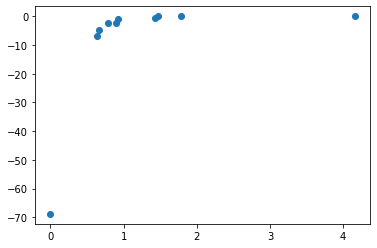

In [66]:
plt.scatter(plot_test[['R']],plot_test[['Ect+mix']])
plt.show()

In [67]:
plot_test = sorting_info(get_one_frag_feat_info(data_FMO1_1, data_FMO2_1, 'I', 29), "Erc+di").head(10)
plot_test

,I,J,DL,Z,R,Q(I->J),EIJ-EI-EJ,dDIJ*VIJ,total,Ees,Eex,Ect+mix,Erc+di,Gsol
377,28,27,C1,0,0.00,0.0378,-9508.328,-0.167,-9508.495,-9265.799,-134.561,-68.828,-39.308,0.0
366,28,16,C1,0,0.63,0.0746,-55.088,1.234,-53.854,-60.281,19.739,-6.928,-6.384,0.0
374,28,24,C1,0,0.66,0.0639,-37.409,0.234,-37.176,-41.208,13.654,-4.897,-4.725,0.0
375,28,25,C1,0,0.79,0.0318,-19.999,-1.574,-21.573,-19.343,4.511,-2.506,-4.235,0.0
376,28,26,C1,0,0.89,0.0270,-1.369,-3.946,-5.315,-4.874,5.791,-2.277,-3.955,0.0
364,28,14,C1,0,0.92,-0.0019,-0.034,-0.922,-0.956,-0.960,4.344,-0.935,-3.405,0.0
365,28,15,C1,0,1.43,0.0020,5.056,-0.209,4.848,5.813,0.009,-0.443,-0.532,0.0
367,28,17,C1,0,1.26,0.0003,7.040,0.022,7.062,7.230,0.011,0.004,-0.183,0.0
370,28,20,C1,0,1.47,0.0004,-6.977,0.066,-6.911,-6.742,0.000,-0.075,-0.095,0.0
362,28,12,C1,0,1.78,0.0000,0.768,0.213,0.981,1.061,-0.001,-0.016,-0.062,0.0


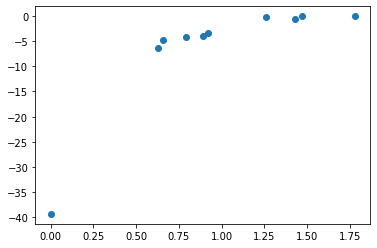

In [68]:
plt.scatter(plot_test[['R']],plot_test[['Erc+di']])
plt.show()

In [69]:
plot_test = sorting_info(get_one_frag_feat_info(data_FMO1_1, data_FMO2_1, 'I', 29), "Q(I->J)").head(10)
plot_test

,I,J,DL,Z,R,Q(I->J),EIJ-EI-EJ,dDIJ*VIJ,total,Ees,Eex,Ect+mix,Erc+di,Gsol
364,28,14,C1,0,0.92,-0.0019,-0.034,-0.922,-0.956,-0.960,4.344,-0.935,-3.405,0.0
373,28,23,S1,0,2.05,0.0000,-3.329,0.000,-3.329,-3.329,0.000,0.000,0.000,0.0
372,28,22,S1,0,2.66,0.0000,-6.462,0.000,-6.462,-6.462,0.000,0.000,0.000,0.0
371,28,21,S1,0,2.58,0.0000,1.320,0.000,1.320,1.320,0.000,0.000,0.000,0.0
369,28,19,S1,0,3.39,0.0000,1.009,0.000,1.009,1.009,0.000,0.000,0.000,0.0
368,28,18,S1,0,2.45,0.0000,-3.473,0.000,-3.473,-3.473,0.000,0.000,0.000,0.0
363,28,13,S1,0,3.05,0.0000,1.679,0.000,1.679,1.679,0.000,0.000,0.000,0.0
362,28,12,C1,0,1.78,0.0000,0.768,0.213,0.981,1.061,-0.001,-0.016,-0.062,0.0
361,28,11,S1,0,4.07,0.0000,0.510,0.000,0.510,0.510,0.000,0.000,0.000,0.0
351,28,1,S1,0,2.33,0.0000,-2.227,0.000,-2.227,-2.227,0.000,0.000,0.000,0.0


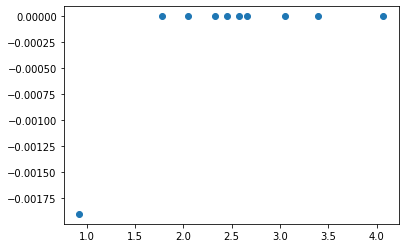

In [70]:
plt.scatter(plot_test[['R']],plot_test[['Q(I->J)']])
plt.show()

In [108]:
fragment_40[['frag_I ', ' frag_J ', 'DIST ', 'DELTA_SCS_MP2']]

,frag_I,frag_J,DIST,DELTA_SCS_MP2
741,40,1,40.153,0.000
742,40,2,38.000,0.000
743,40,3,31.866,0.000
744,40,4,30.812,0.000
745,40,5,25.398,0.000
...,...,...,...,...
775,40,35,11.037,0.000
776,40,36,8.436,0.000
777,40,37,7.047,0.000
778,40,38,2.416,-1.715


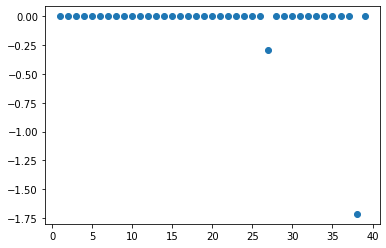

In [109]:
#plt.plot(fragment_40[['DIST ', 'SCS_MP2 ']])
plt.scatter(fragment_40[[' frag_J ']],fragment_40[['DELTA_SCS_MP2']])
#plt.plot(fragment_40[[' frag_J ']], fragment_40[['SCS_MP2 ']])
plt.show()

In [97]:
frag_40_sorted = fragment_40.sort_values(by=['DIST '])

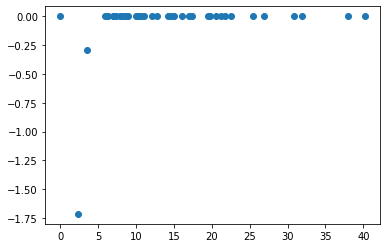

In [111]:
plt.scatter(frag_40_sorted[['DIST ']], frag_40_sorted[['DELTA_SCS_MP2']])

analyzing over PIEDA in Arginine residue (fragment 40)

In [113]:
fragment_40_pieda = data_pieda_mix_4n1zn.loc[data_pieda_mix_4n1zn['frag_I '] == 40]

In [114]:
fragment_40_pieda.sort_values(by=['DIST '])

,frag_I,frag_J,DIST,Total,ES,EX,CT+mix,DI(MP2),q(I=>J)
779,40,39,0.000,0.000,0.000,0.000,0.000,0.000,0.000
778,40,38,2.416,-2.562,-0.166,1.804,-2.058,-2.142,-0.017
767,40,27,3.517,-1.545,-0.884,0.023,-0.318,-0.367,-0.002
760,40,20,5.956,0.212,0.212,0.000,0.000,0.000,0.000
769,40,29,6.279,-1.843,-1.843,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...
746,40,6,26.888,0.013,0.013,0.000,0.000,0.000,0.000
744,40,4,30.812,8.609,8.609,0.000,0.000,0.000,0.000
743,40,3,31.866,-0.083,-0.083,0.000,0.000,0.000,0.000
742,40,2,38.000,-0.017,-0.017,0.000,0.000,0.000,0.000


In [128]:
fragment_40_pieda[['frag_I ', 'frag_J ', 'DIST ', 'CT+mix ']]

,frag_I,frag_J,DIST,CT+mix
741,40,1,40.153,0.000
742,40,2,38.000,0.000
743,40,3,31.866,0.000
744,40,4,30.812,0.000
745,40,5,25.398,0.000
...,...,...,...,...
775,40,35,11.037,0.000
776,40,36,8.436,0.000
777,40,37,7.047,0.000
778,40,38,2.416,-2.058


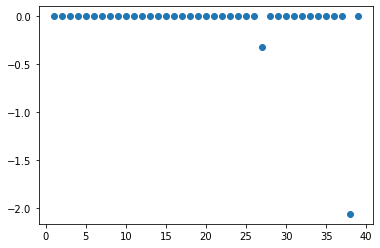

In [129]:
plt.scatter(fragment_40_pieda[['frag_J ']],fragment_40_pieda[['CT+mix ']])

In [130]:
frag_40_pieda_sorted = fragment_40_pieda.sort_values(by=['DIST '])

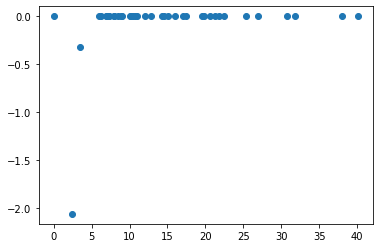

In [131]:
plt.scatter(frag_40_pieda_sorted[['DIST ']], frag_40_pieda_sorted[['CT+mix ']])

In [147]:
def get_IFIE_IFD(df, n_fragj, sorting=' frag_J '):
    """
    """
    frag_n = df.loc[df['frag_I '] == n_fragj]
    return frag_n.sort_values(by=[sorting])

In [152]:
def get_PIEDA_IFD(df, n_fragj, sorting='CT+mix '):
    """
    """
    frag_n = df.loc[df['frag_I '] == n_fragj]
    return frag_n.sort_values(by=[sorting])

In [188]:
def plot_IFIE_IFD(df, n_fragj):
    """
    """
    frag_n = df.loc[df['frag_I '] == n_fragj]
    frag_n_sort = frag_n.sort_values(by=['DIST '])
    frag_n.plot(" frag_J ", "DELTA_SCS_MP2", kind="bar", figsize=(40,30), fontsize=(28))
    #plt.scatter(frag_n[[' frag_J ']],frag_n[['DELTA_SCS_MP2']])

In [201]:
def plot_CT_mix_IFD(df, n_fragj):
    """
    """
    frag_n = df.loc[df['frag_I '] == n_fragj]
    frag_n_sort = frag_n.sort_values(by=['DIST '])
    frag_n_sort.plot("DIST ", "CT+mix ", kind="scatter", figsize=(21,10), fontsize=(28))
    #plt.scatter(frag_n_sort[['DIST ']], frag_n_sort[['CT+mix ']])

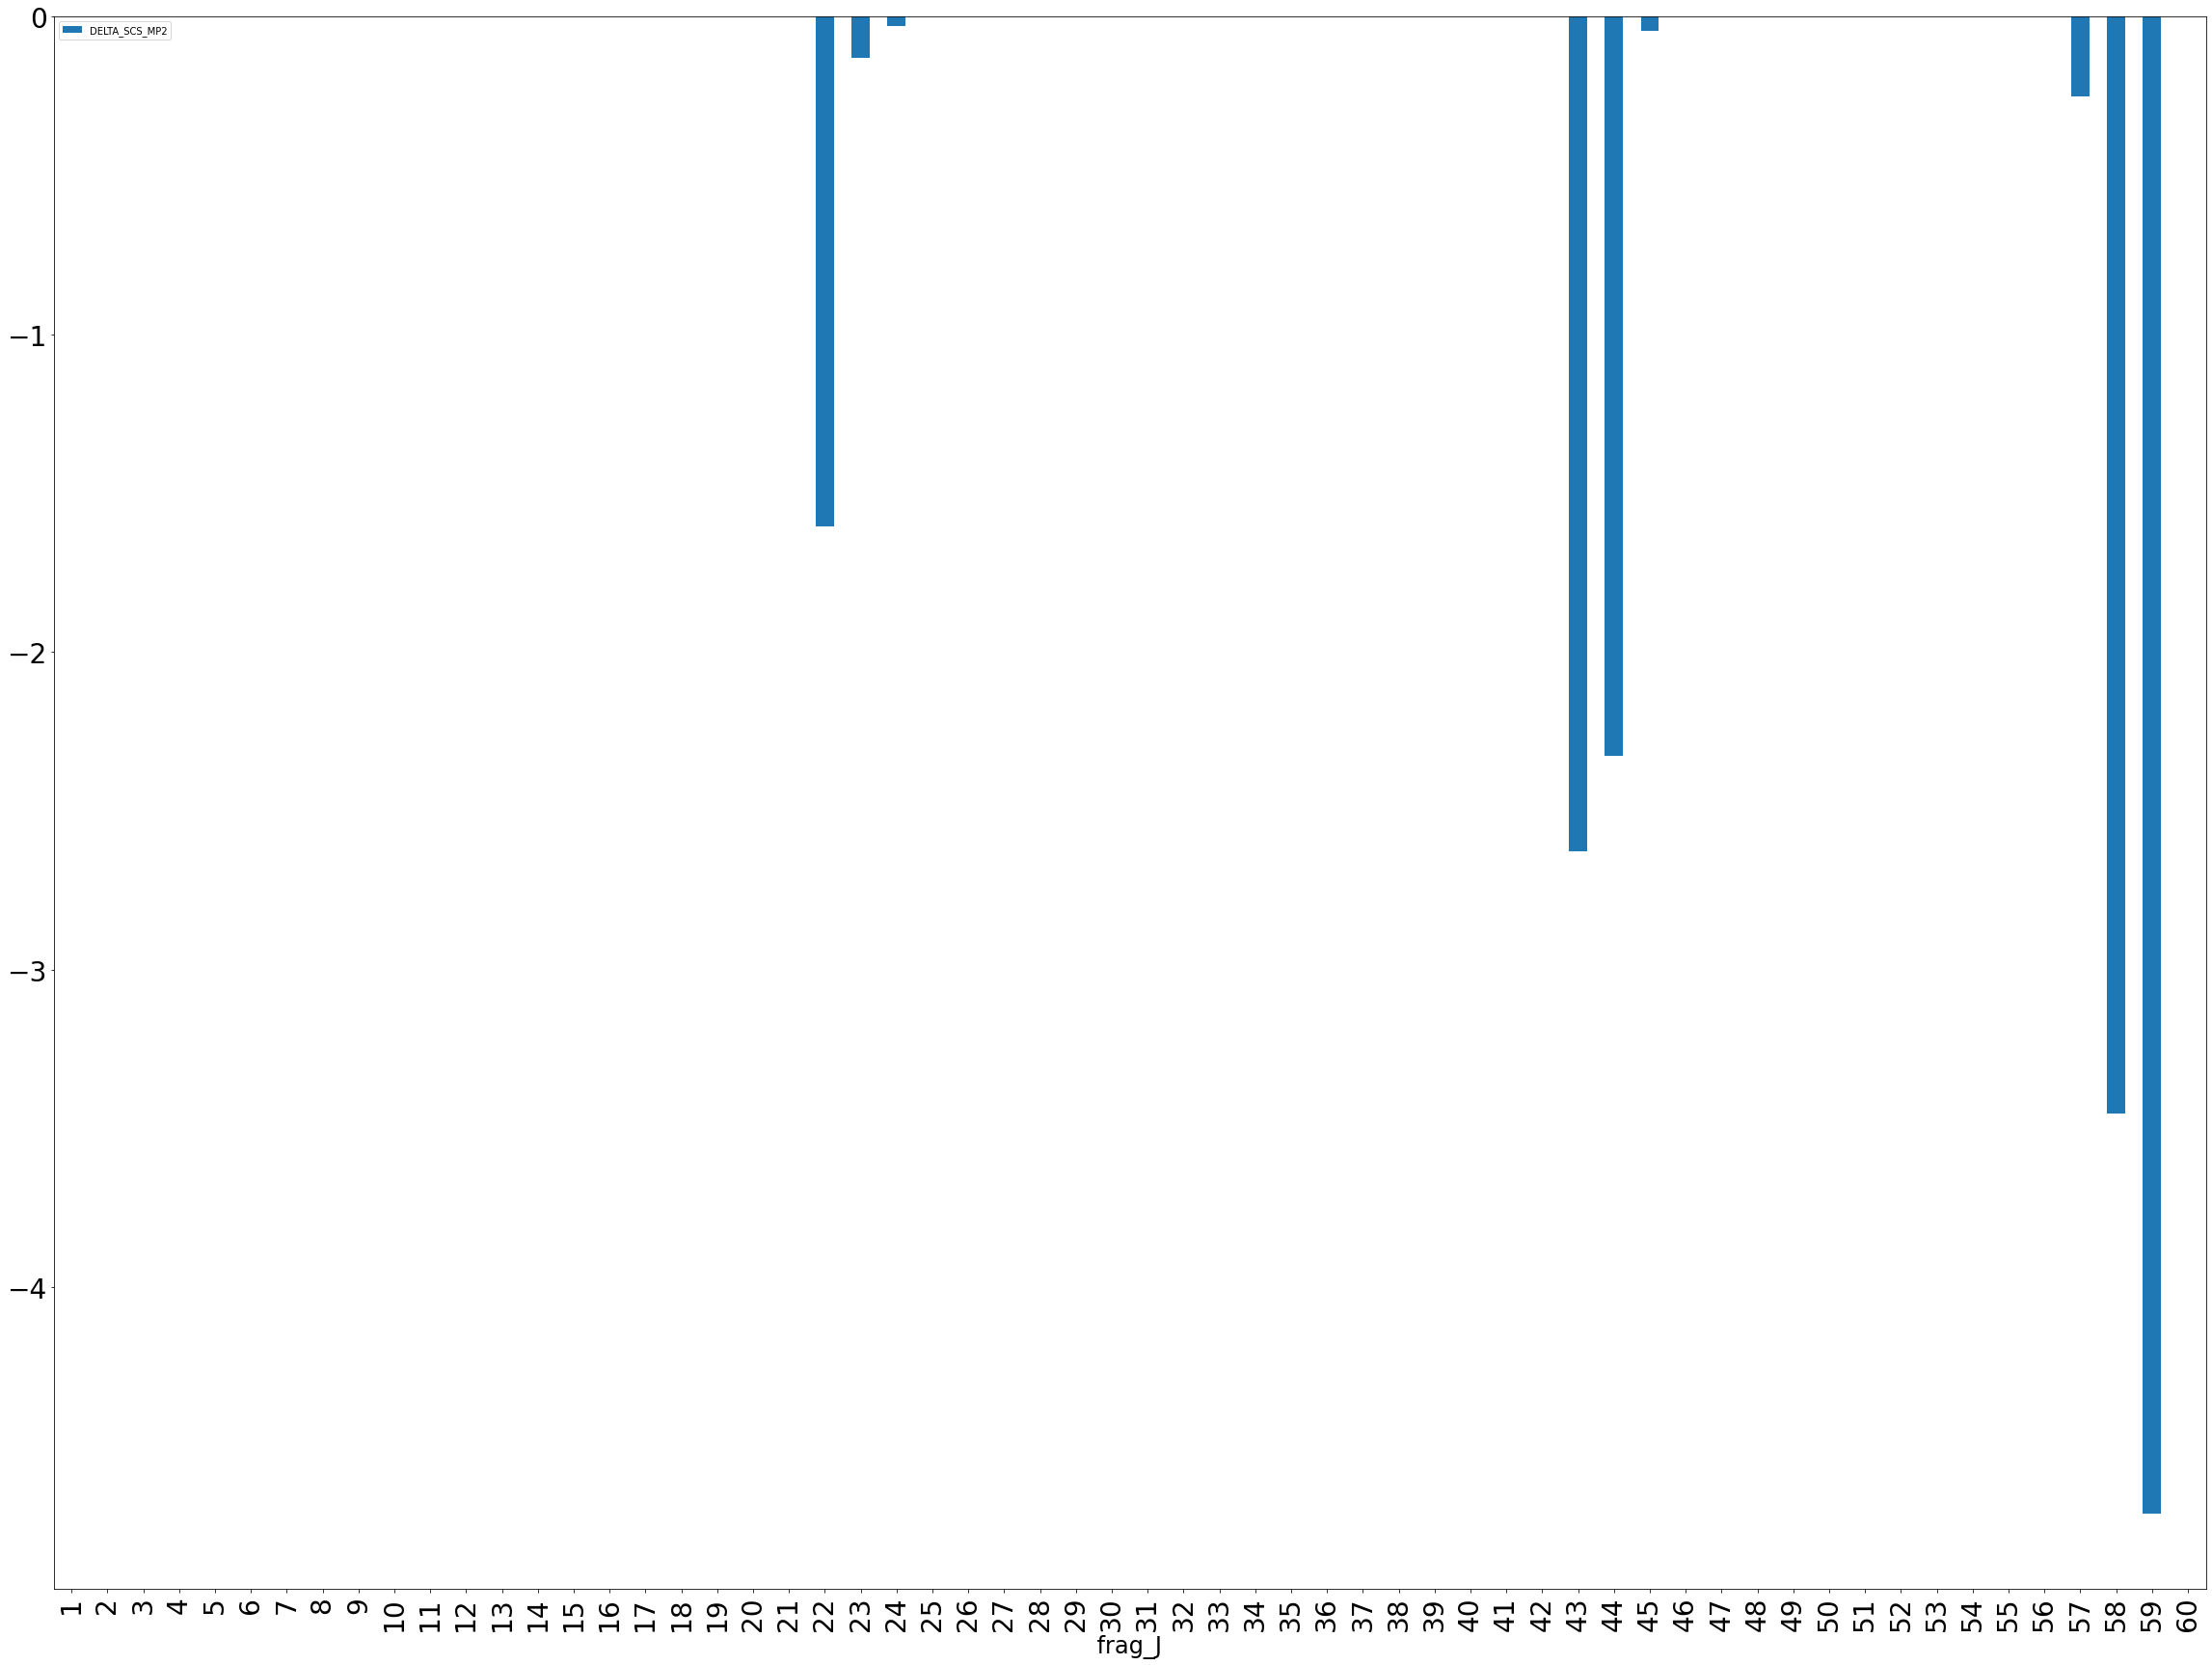

In [189]:
plot_IFIE_IFD(data_ifie_mix_4n1zn, 61)

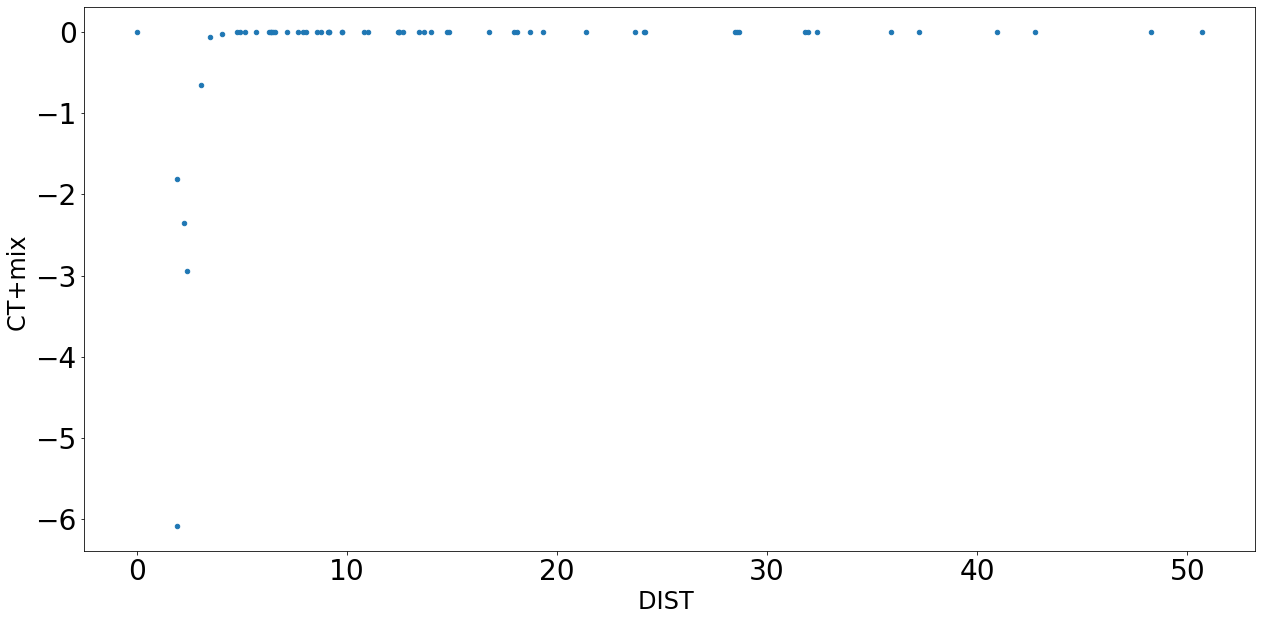

In [202]:
plot_CT_mix_IFD(data_pieda_mix_4n1zn, 61)

In [ ]:
grouped_mp2.describe()

In [ ]:
data_ct_mix_4n1zn.groupby('MP2 ')['frag_I'].nunique()

In [15]:
%matplotlib inline

Definition of the reference fragment

Look into:
 
! ## AUTOMATIC FRAGMENTATION

! Seq. Frag. Residue S-S  N-term.  C-Term. Charge
A   1      1    SER           T        F      0 Uncharged Polar
            .
            .
            .
A 504    379    R9W           T        T      1

  The system has no ion
  (...)

Residues to study :40, 60, 61. They are, at the same time, the numer of residue in frag_I